In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import optuna.integration.lightgbm as lgb
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

C:\Users\dheepig\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\dheepig\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Problem 1 - Customer Churn Data Analysis

## Notes Week - 1

In [2]:
ds=pd.read_excel('C:/Users/dheepig/Desktop/Dheepika/Great Lakes/Session 12- Capestone Project/Final Project/CC_EDTH_02_Customer Churn/CC_EDTH_02_Customer Churn/Customer Churn Data.xlsx',sheet_name='Data for DSBA')
ds.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11,1,5.0,159.93,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15,0,0.0,120.90,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14,0,3.0,NaN,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23,0,3.0,134.07,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11,1,3.0,129.60,Mobile


In [3]:
ds["Gender"] = ds["Gender"].replace("M", 'Male').replace("F", 'Female')

### Dropping unwanted columns

In [4]:
ds = ds.drop(["AccountID"], axis=1)
ds.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11,1,5.0,159.93,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15,0,0.0,120.90,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14,0,3.0,NaN,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23,0,3.0,134.07,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11,1,3.0,129.60,Mobile


# Question 2 b) Visual inspection of data (rows, columns, descriptive details)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

In [6]:
row, col = ds.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 11260 rows and 18 columns in the dataset


In [7]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,NaN,NaN,NaN,10.910468,12.861364,0.0,2.0,8.0,16.0,99.0
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,2,Male,6704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,NaN,NaN,NaN,3.582885,1.187175,0.0,3.0,4.0,4.0,6.0
account_segment,11163,5,Regular Plus,4124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144.0,NaN,NaN,NaN,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0


In [8]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.0,0.00,0.00,1.0
Tenure,11158.0,10.910468,12.861364,0.0,2.0,8.00,16.00,99.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.0,1.00,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.0,16.00,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.0,3.00,3.00,5.0
Account_user_count,11148.0,3.582885,1.187175,0.0,3.0,4.00,4.00,6.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.0,3.00,4.00,5.0
rev_per_month,10469.0,6.362594,11.909686,1.0,3.0,5.00,7.00,140.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.0,0.00,1.00,1.0
rev_growth_yoy,11260.0,16.189076,3.766505,0.0,13.0,15.00,19.00,28.0


In [9]:
ds.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy               int64
coupon_used_for_payment      int64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [10]:
ds.skew(axis=0,skipna=True)

C:\Users\dheepig\AppData\Local\Temp/ipykernel_12412/3946261126.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.skew(axis=0,skipna=True)


Churn                      1.772606
Tenure                     3.891973
City_Tier                  0.737107
CC_Contacted_LY            1.422977
Service_Score              0.003891
Account_user_count        -0.861867
CC_Agent_Score            -0.142149
rev_per_month              9.093909
Complain_ly                0.950876
rev_growth_yoy             0.729281
coupon_used_for_payment    2.575218
Day_Since_CC_connect       1.272969
cashback                   8.769003
dtype: float64

In [11]:
ds.kurtosis(axis=0,skipna=True)

C:\Users\dheepig\AppData\Local\Temp/ipykernel_12412/1867820766.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.kurtosis(axis=0,skipna=True)


Churn                       1.142336
Tenure                     23.392592
City_Tier                  -1.398498
CC_Contacted_LY             8.226080
Service_Score              -0.668069
Account_user_count          1.336320
CC_Agent_Score             -1.124834
rev_per_month              86.963130
Complain_ly                -1.096036
rev_growth_yoy             -0.151865
coupon_used_for_payment     9.101885
Day_Since_CC_connect        5.328472
cashback                   81.099684
dtype: float64

In [12]:
ds[['Churn','Tenure','City_Tier','CC_Contacted_LY','Service_Score','Account_user_count','CC_Agent_Score','Payment','Gender',
    'rev_per_month','coupon_used_for_payment','Day_Since_CC_connect','cashback','Marital_Status','Complain_ly','rev_growth_yoy']].nunique()

Churn                         2
Tenure                       37
City_Tier                     3
CC_Contacted_LY              44
Service_Score                 6
Account_user_count            7
CC_Agent_Score                5
Payment                       5
Gender                        2
rev_per_month                58
coupon_used_for_payment      17
Day_Since_CC_connect         23
cashback                   5692
Marital_Status                3
Complain_ly                   2
rev_growth_yoy               20
dtype: int64

In [13]:
for column in ds.columns:
    if ds[column].dtype=='object':
        print(column.upper(),': ',ds[column].nunique())
        print(ds[column].value_counts().sort_values())
        print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  2
Female    4448
Male      6704
Name: Gender, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4124
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     5860
Name: Marital_Status, dtype: int64


LOGIN_DEVICE :  3
Both         539
Computer    3018
Mobile      7482
Name: Login_device, dtype: int64




In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

# 3. Exploratory data analysis

# a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

In [15]:
ds[['Churn','City_Tier','CC_Contacted_LY']].describe()

,Churn,City_Tier,CC_Contacted_LY
count,11260.000000,11148.000000,11158.000000
mean,0.168384,1.653929,17.867091
std,0.374223,0.915015,8.853269
min,0.000000,1.000000,4.000000
25%,0.000000,1.000000,11.000000
50%,0.000000,1.000000,16.000000
75%,0.000000,3.000000,23.000000
max,1.000000,3.000000,132.000000


C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

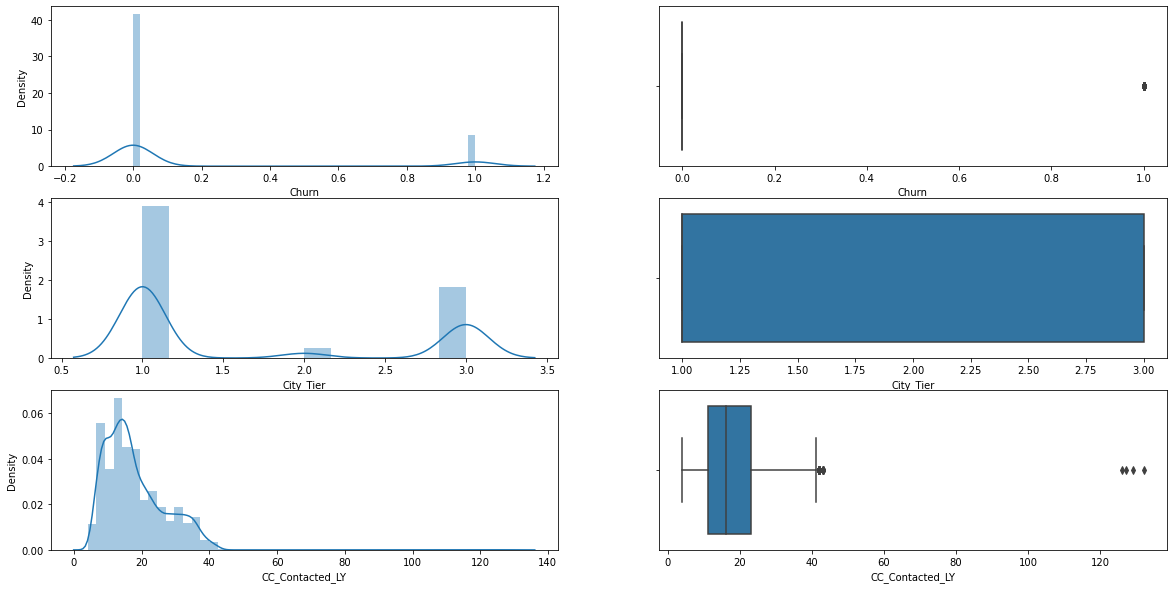

In [16]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['Churn'],kde=True,ax=axes[0][0])
sns.boxplot(x='Churn',data=ds,ax=axes[0][1])
sns.distplot(ds['City_Tier'],kde=True,ax=axes[1][0])
sns.boxplot(x='City_Tier',data=ds,ax=axes[1][1])
sns.distplot(ds['CC_Contacted_LY'],kde=True,ax=axes[2][0])
sns.boxplot(x='CC_Contacted_LY',data=ds,ax=axes[2][1])
plt.show()

In [17]:
ds[['Service_Score','CC_Agent_Score','Complain_ly']].describe()

,Service_Score,CC_Agent_Score,Complain_ly
count,11162.000000,11144.000000,10903.000000
mean,2.902526,3.066493,0.285334
std,0.725584,1.379772,0.451594
min,0.000000,1.000000,0.000000
25%,2.000000,2.000000,0.000000
50%,3.000000,3.000000,0.000000
75%,3.000000,4.000000,1.000000
max,5.000000,5.000000,1.000000


C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

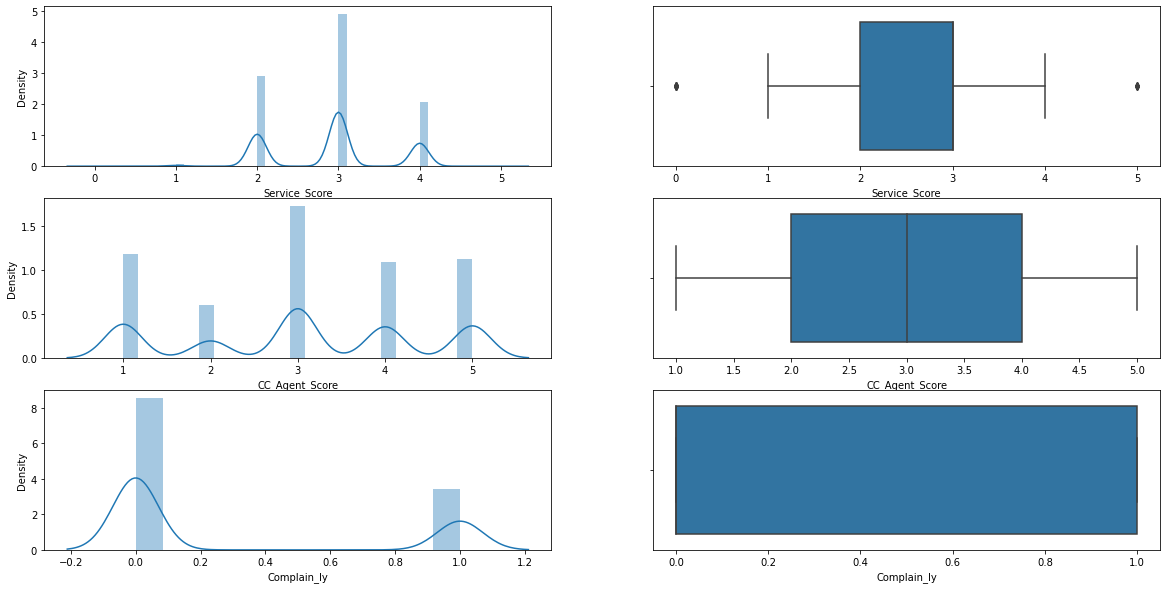

In [18]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['Service_Score'],kde=True,ax=axes[0][0])
sns.boxplot(x='Service_Score',data=ds,ax=axes[0][1])
sns.distplot(ds['CC_Agent_Score'],kde=True,ax=axes[1][0])
sns.boxplot(x='CC_Agent_Score',data=ds,ax=axes[1][1])
sns.distplot(ds['Complain_ly'],kde=True,ax=axes[2][0])
sns.boxplot(x='Complain_ly',data=ds,ax=axes[2][1])
plt.show()

In [19]:
ds[['Account_user_count','rev_per_month','rev_growth_yoy']].describe()

,Account_user_count,rev_per_month,rev_growth_yoy
count,11148.000000,10469.000000,11260.000000
mean,3.582885,6.362594,16.189076
std,1.187175,11.909686,3.766505
min,0.000000,1.000000,0.000000
25%,3.000000,3.000000,13.000000
50%,4.000000,5.000000,15.000000
75%,4.000000,7.000000,19.000000
max,6.000000,140.000000,28.000000


C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

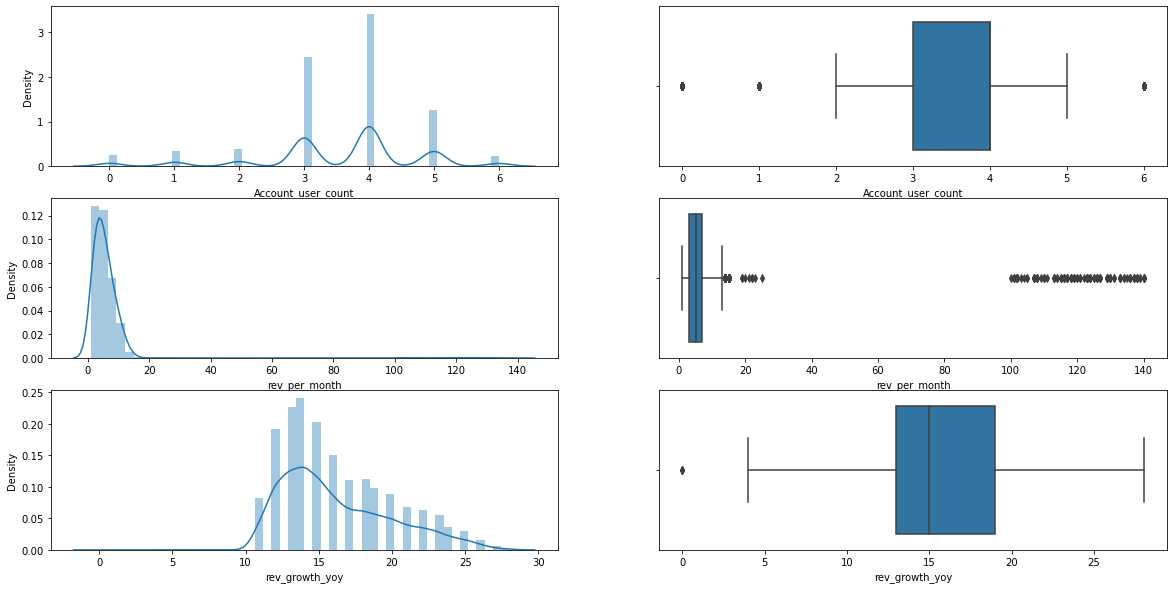

In [20]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['Account_user_count'],kde=True,ax=axes[0][0])
sns.boxplot(x='Account_user_count',data=ds,ax=axes[0][1])
sns.distplot(ds['rev_per_month'],kde=True,ax=axes[1][0])
sns.boxplot(x='rev_per_month',data=ds,ax=axes[1][1])
sns.distplot(ds['rev_growth_yoy'],kde=True,ax=axes[2][0])
sns.boxplot(x='rev_growth_yoy',data=ds,ax=axes[2][1])
plt.show()

In [21]:
ds[['coupon_used_for_payment','Day_Since_CC_connect','cashback']].describe()

,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.000000,10903.000000,10789.000000
mean,1.790142,4.632762,196.199993
std,1.969505,3.697733,178.663928
min,0.000000,0.000000,0.000000
25%,1.000000,2.000000,147.200000
50%,1.000000,3.000000,165.240000
75%,2.000000,8.000000,199.980000
max,16.000000,47.000000,1997.000000


C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

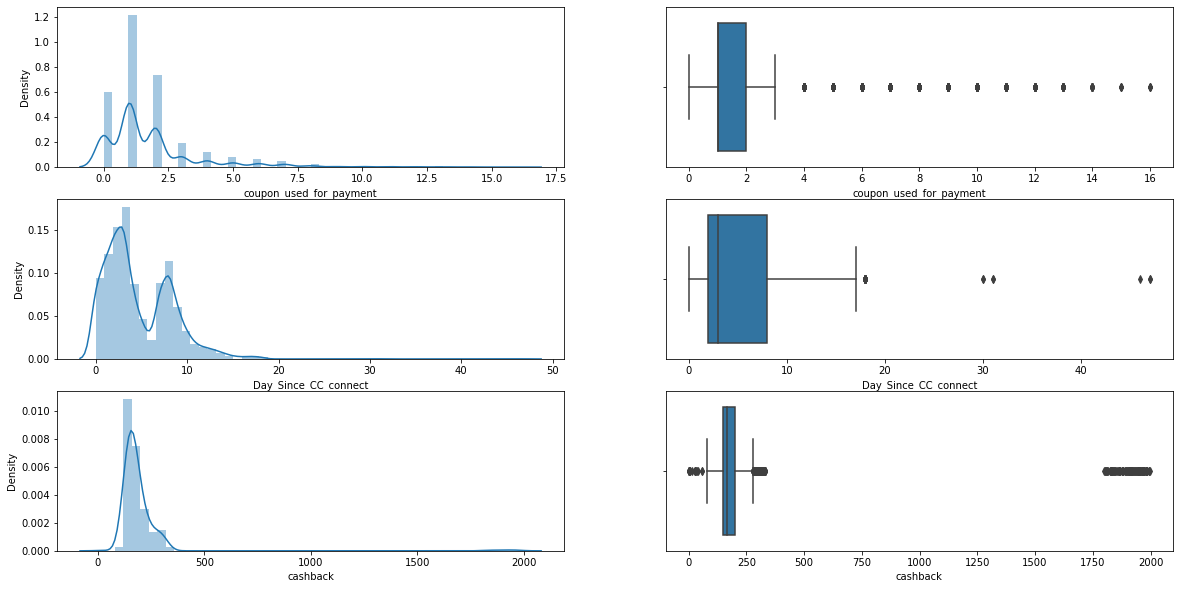

In [22]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['coupon_used_for_payment'],kde=True,ax=axes[0][0])
sns.boxplot(x='coupon_used_for_payment',data=ds,ax=axes[0][1])
sns.distplot(ds['Day_Since_CC_connect'],kde=True,ax=axes[1][0])
sns.boxplot(x='Day_Since_CC_connect',data=ds,ax=axes[1][1])
sns.distplot(ds['cashback'],kde=True,ax=axes[2][0])
sns.boxplot(x='cashback',data=ds,ax=axes[2][1])
plt.show()

Text(0.5, 1.0, 'Distribution of Churn based on gender of customers')

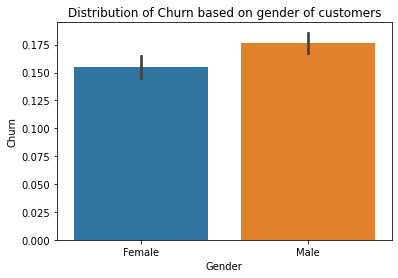

In [23]:
sns.barplot(x="Gender", y="Churn", data=ds)
plt.title("Distribution of Churn based on gender of customers")

In [24]:
d={}

for i in ds.columns:
    d[i] = pd.concat([ds.groupby(i).Churn.sum(),ds[i].value_counts(),round(ds.groupby(i).Churn.sum()*100/ds[i].value_counts(),2)], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'}, )

In [25]:
def analysis_chart(variable):
  plt.figure(figsize=(20,12))
  fig, ax = plt.subplots()
  title1 = 'Customers Churn analysed by ' + variable
  plt.title(title1)
  line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
  plt.xlabel (variable)
  plt.ylabel ('No. of customers')
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  ax2=ax.twinx()
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer Churn', linestyle='dashed')
  plt.ylabel ('percentage of customers churned')
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1))
  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)

In [26]:
col = ['Tenure','Account_user_count','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect',
       'cashback','Service_Score','CC_Agent_Score','Complain_ly','Churn','City_Tier','CC_Contacted_LY']

<Figure size 1440x864 with 0 Axes>

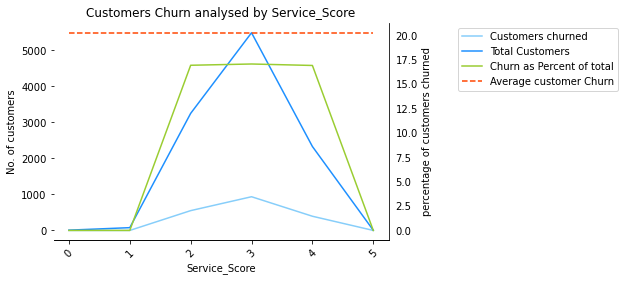

In [27]:
analysis_chart('Service_Score')

<Figure size 1440x864 with 0 Axes>

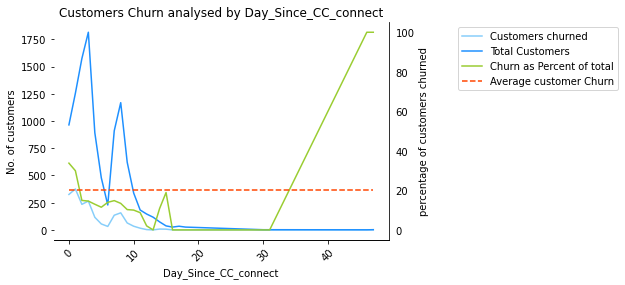

In [28]:
analysis_chart('Day_Since_CC_connect')

<Figure size 1440x864 with 0 Axes>

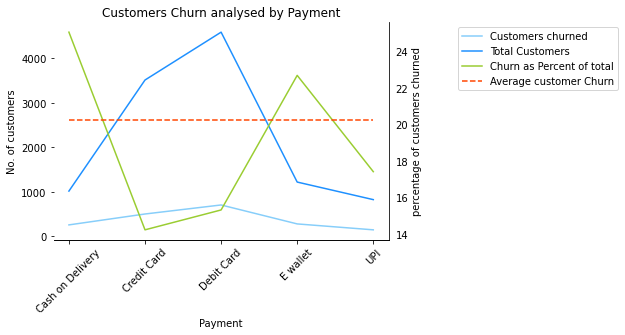

In [29]:
analysis_chart('Payment')

<Figure size 1440x864 with 0 Axes>

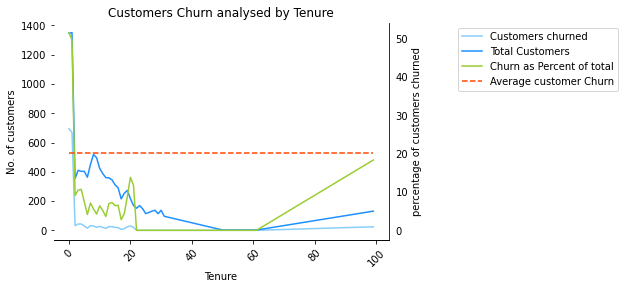

In [30]:
analysis_chart('Tenure')

<Figure size 1440x864 with 0 Axes>

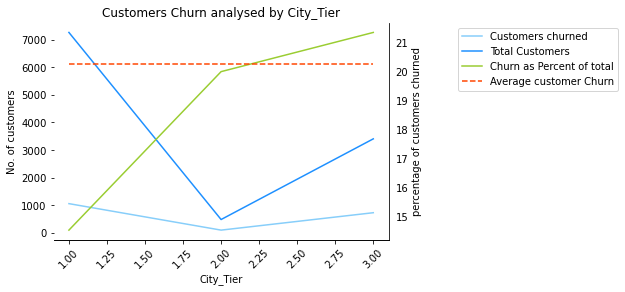

In [31]:
analysis_chart('City_Tier')

<Figure size 1440x864 with 0 Axes>

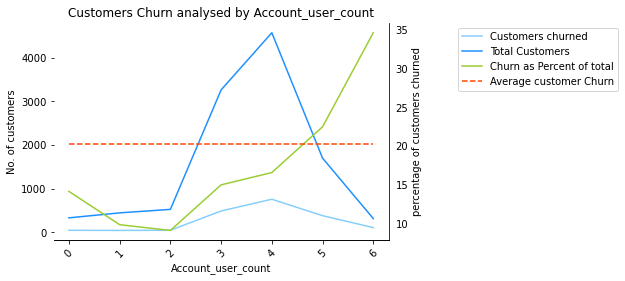

In [32]:
analysis_chart('Account_user_count')

<Figure size 1440x864 with 0 Axes>

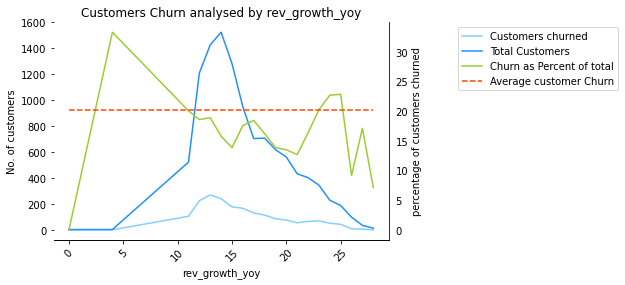

In [33]:
analysis_chart('rev_growth_yoy')

<Figure size 1440x864 with 0 Axes>

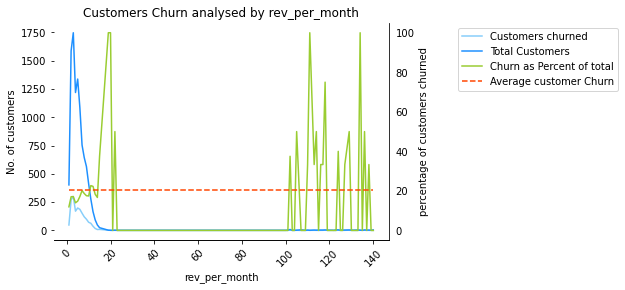

In [34]:
analysis_chart('rev_per_month')

<Figure size 1440x864 with 0 Axes>

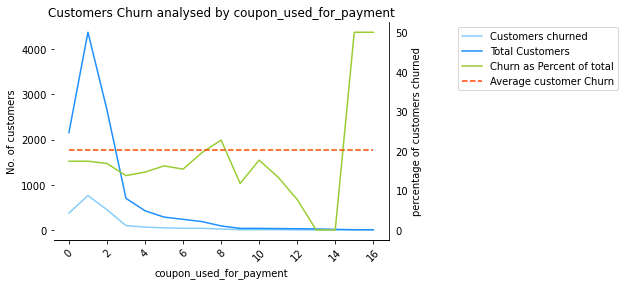

In [35]:
analysis_chart('coupon_used_for_payment')

Text(0.5, 1.0, 'Distribution of Churn based on customer care contact last year')

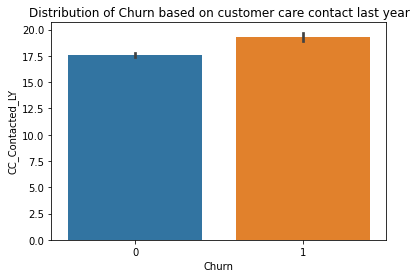

In [36]:
sns.barplot(x="Churn", y="CC_Contacted_LY", data=ds)
plt.title("Distribution of Churn based on customer care contact last year")

Text(0.5, 1.0, 'Distribution of Churn based on login device')

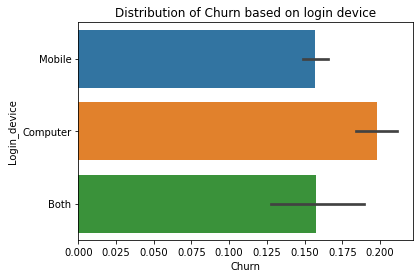

In [37]:
sns.barplot(x="Churn", y="Login_device", data=ds)
plt.title("Distribution of Churn based on login device")

Text(0.5, 1.0, 'Distribution of Churn based on number of accounts tagged to each customer')

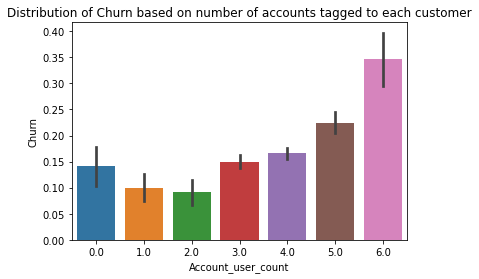

In [38]:
sns.barplot(x="Account_user_count", y="Churn", data=ds)
plt.title("Distribution of Churn based on number of accounts tagged to each customer")

Text(0.5, 1.0, 'Distribution of Churn based on revenue generated by account last year')

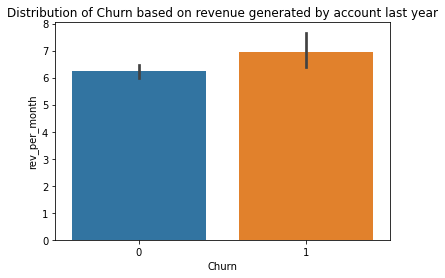

In [39]:
sns.barplot(x="Churn", y="rev_per_month", data=ds)
plt.title("Distribution of Churn based on revenue generated by account last year")

Text(0.5, 1.0, 'Distribution of Churn based on cashback given to the customers')

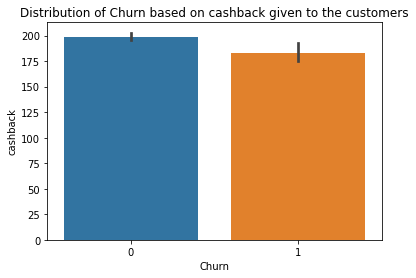

In [40]:
sns.barplot(x="Churn", y="cashback", data=ds)
plt.title("Distribution of Churn based on cashback given to the customers")

Text(0.5, 1.0, 'Distribution of Churn based on marital status of the customers')

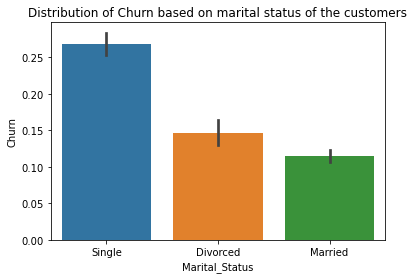

In [41]:
sns.barplot(x="Marital_Status", y="Churn", data=ds)
plt.title("Distribution of Churn based on marital status of the customers")

Text(0.5, 1.0, 'Distribution of Churn based on no customer care contact')

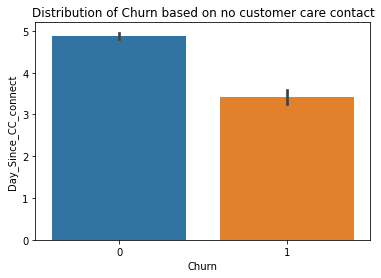

In [42]:
sns.barplot(x="Churn", y="Day_Since_CC_connect", data=ds)
plt.title("Distribution of Churn based on no customer care contact")

Text(0.5, 1.0, 'Distribution of Churn based on coupon used for payment by customers')

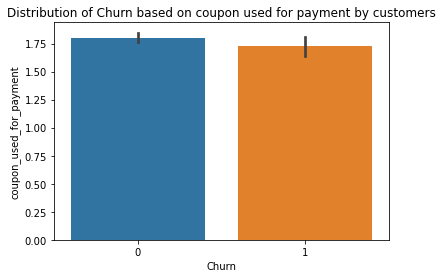

In [43]:
sns.barplot(x="Churn", y="coupon_used_for_payment", data=ds)
plt.title("Distribution of Churn based on coupon used for payment by customers")

Text(0.5, 1.0, 'Distribution of Churn based on city tiers of the customers')

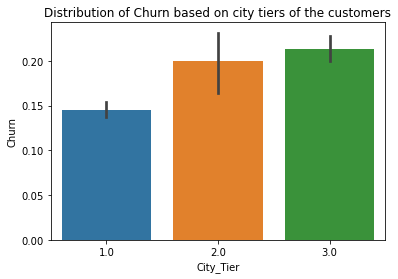

In [44]:
sns.barplot(x="City_Tier", y="Churn", data=ds)
plt.title("Distribution of Churn based on city tiers of the customers")

Text(0.5, 1.0, 'Distribution of Churn account segment of the customers')

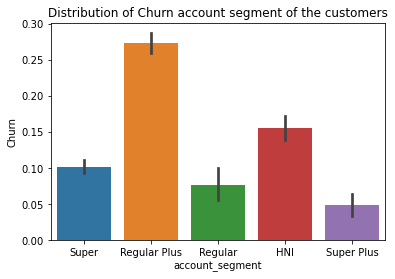

In [45]:
sns.barplot(x="account_segment", y="Churn", data=ds)
plt.title("Distribution of Churn account segment of the customers")

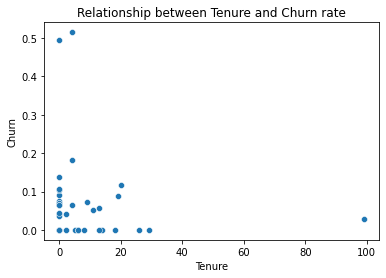

In [46]:
sns.scatterplot(x=ds['Tenure'],y=ds.groupby('Tenure').Churn.mean())
plt.title("Relationship between Tenure and Churn rate")
plt.show()

C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

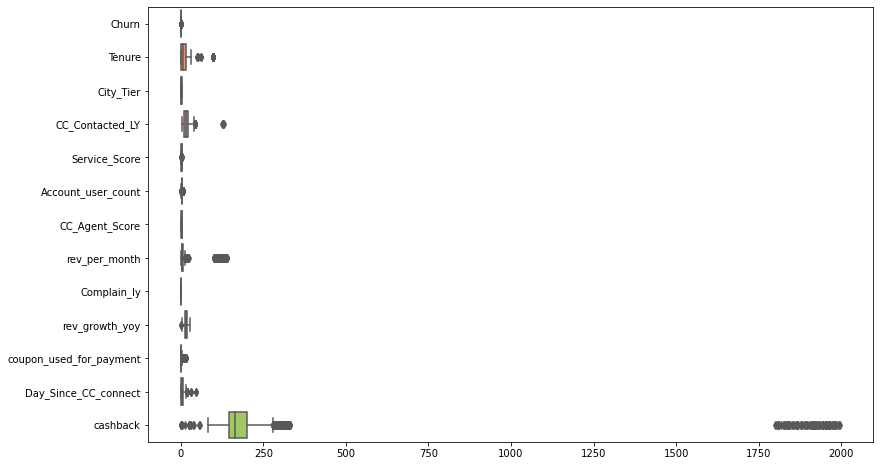

In [47]:
plt.figure(figsize=(13,8))
sns.boxplot(data=ds,orient="h", palette="Set2")

# b) Bivariate analysis (relationship between different variables , correlations)

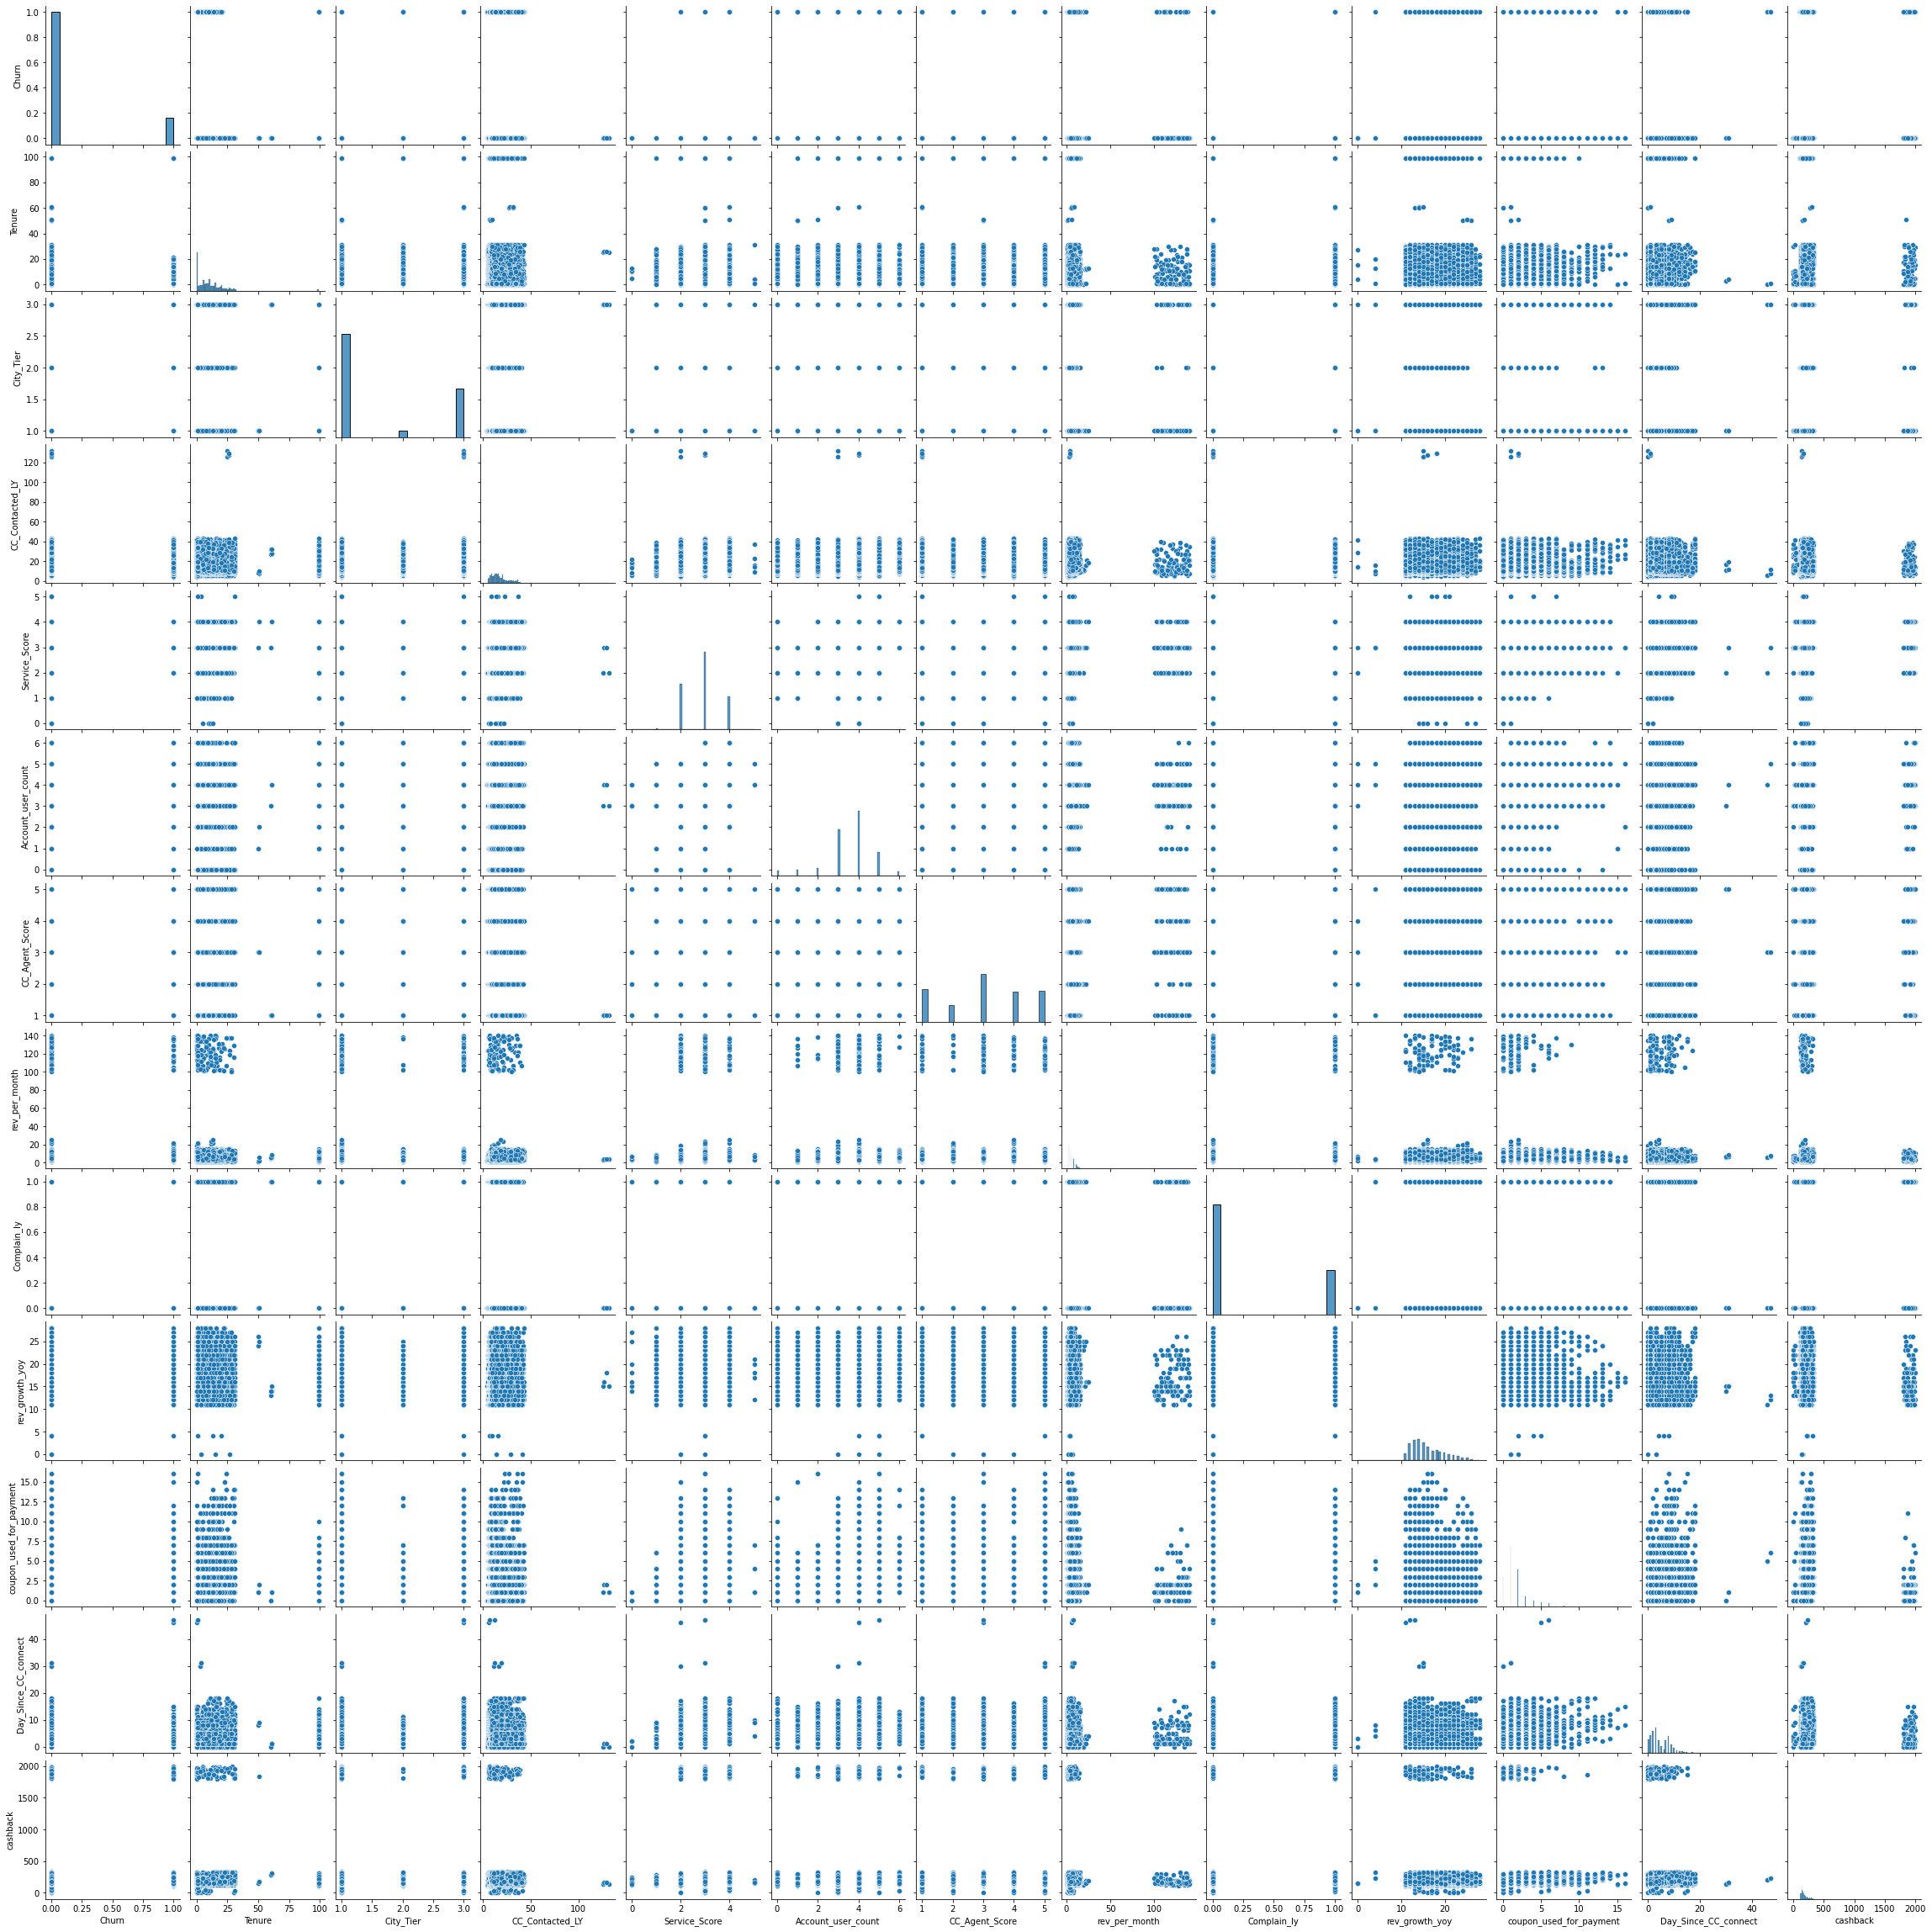

In [48]:
sns.pairplot(ds)

C:\Users\dheepig\AppData\Local\Temp/ipykernel_12412/1203850624.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(),annot=True,fmt=".2f")


Text(0.5, 1.0, 'Correlation Matrix for the Customer Churn Dataset')

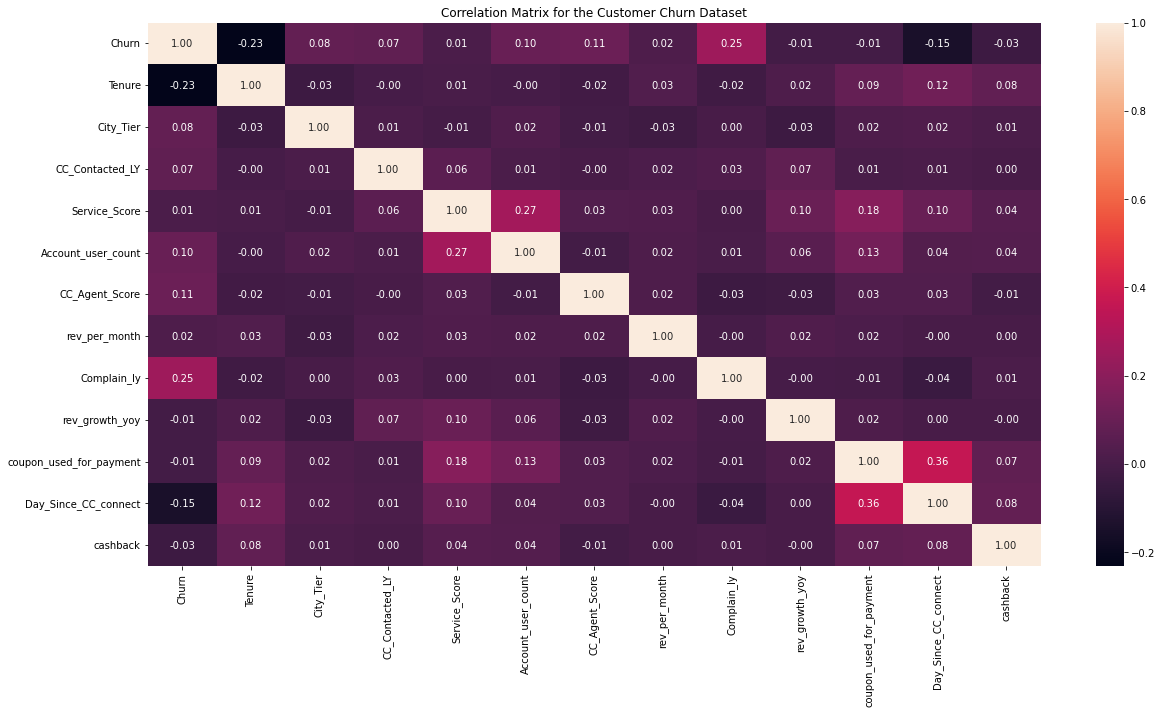

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(ds.corr(),annot=True,fmt=".2f")
plt.title("Correlation Matrix for the Customer Churn Dataset")

# a) Removal of unwanted variables (if applicable)

In [50]:
# We have already dropped 'AccountID' column from the dataset as it will be of no use for model prediction.

# b) Missing Value treatment (if applicable)

### Fixing Missing Values

In [51]:
ds.isnull().any()

Churn                      False
Tenure                      True
City_Tier                   True
CC_Contacted_LY             True
Payment                     True
Gender                      True
Service_Score               True
Account_user_count          True
account_segment             True
CC_Agent_Score              True
Marital_Status              True
rev_per_month               True
Complain_ly                 True
rev_growth_yoy             False
coupon_used_for_payment    False
Day_Since_CC_connect        True
cashback                    True
Login_device                True
dtype: bool

In [52]:
ds['Payment'] = ds['Payment'].fillna("No_info")
ds['Gender'] = ds['Gender'].fillna("No_info")
ds['account_segment'] = ds['account_segment'].fillna("No_info")
ds['Marital_Status'] = ds['Marital_Status'].fillna("No_info")
ds['Login_device'] = ds['Login_device'].fillna("No_info")

In [53]:
ds['Tenure'] = ds['Tenure'].fillna(ds['Tenure'].mean())
ds['Account_user_count'] = ds['Account_user_count'].fillna(ds['Account_user_count'].mean())
ds['rev_per_month'] = ds['rev_per_month'].fillna(ds['rev_per_month'].mean())
ds['Day_Since_CC_connect'] = ds['Day_Since_CC_connect'].fillna(ds['Day_Since_CC_connect'].mean())
ds['cashback'] = ds['cashback'].fillna(ds['cashback'].mean())
ds['City_Tier'] = ds['City_Tier'].fillna(ds['City_Tier'].mean())
ds['CC_Contacted_LY'] = ds['CC_Contacted_LY'].fillna(ds['CC_Contacted_LY'].mean())
ds['Service_Score'] = ds['Service_Score'].fillna(ds['Service_Score'].mean())
ds['CC_Agent_Score'] = ds['CC_Agent_Score'].fillna(ds['CC_Agent_Score'].mean())
ds['Complain_ly'] = ds['Complain_ly'].fillna(ds['Complain_ly'].mean())

In [54]:
ds.isnull().any()

Churn                      False
Tenure                     False
City_Tier                  False
CC_Contacted_LY            False
Payment                    False
Gender                     False
Service_Score              False
Account_user_count         False
account_segment            False
CC_Agent_Score             False
Marital_Status             False
rev_per_month              False
Complain_ly                False
rev_growth_yoy             False
coupon_used_for_payment    False
Day_Since_CC_connect       False
cashback                   False
Login_device               False
dtype: bool

In [55]:
ds.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11,1,5.0,159.930000,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15,0,0.0,120.900000,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14,0,3.0,196.199993,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23,0,3.0,134.070000,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11,1,3.0,129.600000,Mobile


### Fixing Duplicate Values

In [56]:
dup=ds.duplicated().sum()
print("There are total {}".format(dup), "duplicate records in the dataset")

There are total 265 duplicate records in the dataset


In [57]:
ds.drop_duplicates(inplace=True)
dup=ds.duplicated()
print('Number of duplicate rows = %d'%(dup.sum()))
print(ds.shape)

Number of duplicate rows = 0
(10995, 18)


In [58]:
dup=ds.duplicated().sum()
print("There are total {}".format(dup), "duplicate records in the dataset")

There are total 0 duplicate records in the dataset


In [59]:
ds.Churn.value_counts(normalize=True)

0    0.831651
1    0.168349
Name: Churn, dtype: float64

In [60]:
ds.Churn.value_counts()

0    9144
1    1851
Name: Churn, dtype: int64

<AxesSubplot:>

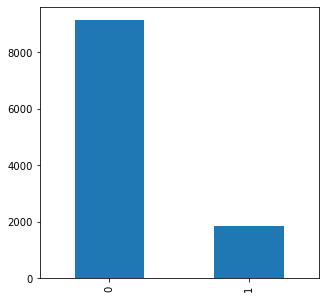

In [61]:
ds['Churn'].value_counts().plot(kind='bar',figsize=(5,5))

# d) Outlier treatment (if required)

### Fixing Outliers

In [62]:
def detect_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [63]:
lr,ur=detect_outlier(ds['Churn'])
lr1,ur1=detect_outlier(ds['City_Tier'])
lr2,ur2=detect_outlier(ds['CC_Contacted_LY'])
lr3,ur3=detect_outlier(ds['Service_Score'])
lr4,ur4=detect_outlier(ds['CC_Agent_Score'])
lr5,ur5=detect_outlier(ds['Complain_ly'])
print("lower range of churn:",lr,"upper range of churn:",ur)
print("lower range of City_Tier:",lr1,"upper range of City_Tier:",ur1)
print("lower range of CC_Contacted_LY:",lr2,"upper range of CC_Contacted_LY:",ur2)
print("lower range of Service_Score:",lr3,"upper range of Service_Score:",ur3)
print("lower range of CC_Agent_Score:",lr4,"upper range of CC_Agent_Score:",ur4)
print("lower range of Complain_ly:",lr5,"upper range of Complain_ly:",ur5)

lower range of churn: 0.0 upper range of churn: 0.0
lower range of City_Tier: -2.0 upper range of City_Tier: 6.0
lower range of CC_Contacted_LY: -7.0 upper range of CC_Contacted_LY: 41.0
lower range of Service_Score: 0.5 upper range of Service_Score: 4.5
lower range of CC_Agent_Score: -1.0 upper range of CC_Agent_Score: 7.0
lower range of Complain_ly: -1.5 upper range of Complain_ly: 2.5


In [64]:
num = ds.select_dtypes(include=['int','float']).columns

In [65]:
def proportion(x):
        xs = pd.Series(sorted(ds[x]))
        Q3 = xs.quantile(q=0.75)
        Q1 = xs.quantile(q=0.25)
        IQR = Q3-Q1
        LR = Q1-(1.5*IQR)
        UR = Q3+(1.5*IQR)
        
        data = ds[x]
        count = 0
        for value in data:
            if (value<LR) or (value>UR):
                count += 1
            else:
                pass

        _proportion = round((count/len(ds[x]))*100,2)
        print('Outlier proportion: {}: {}%'.format(x, _proportion))

In [66]:
for i in num:
    proportion(i)

Outlier proportion: Churn: 16.83%
Outlier proportion: Tenure: 1.26%
Outlier proportion: City_Tier: 0.0%
Outlier proportion: CC_Contacted_LY: 0.38%
Outlier proportion: Service_Score: 0.12%
Outlier proportion: Account_user_count: 9.75%
Outlier proportion: CC_Agent_Score: 0.0%
Outlier proportion: rev_per_month: 1.68%
Outlier proportion: Complain_ly: 0.0%
Outlier proportion: rev_growth_yoy: 0.03%
Outlier proportion: coupon_used_for_payment: 12.42%
Outlier proportion: Day_Since_CC_connect: 1.16%
Outlier proportion: cashback: 8.61%


In [67]:
corr1=ds.corr()
round(corr1,2)

C:\Users\dheepig\AppData\Local\Temp/ipykernel_12412/855781429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1=ds.corr()


,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
Churn,1.00,-0.23,0.08,0.07,0.01,0.10,0.11,0.02,0.25,-0.01,-0.01,-0.14,-0.03
Tenure,-0.23,1.00,-0.03,-0.00,0.01,-0.00,-0.02,0.03,-0.02,0.02,0.09,0.12,0.08
City_Tier,0.08,-0.03,1.00,0.01,-0.01,0.03,-0.01,-0.03,0.00,-0.03,0.02,0.02,0.01
CC_Contacted_LY,0.07,-0.00,0.01,1.00,0.06,0.01,0.00,0.01,0.03,0.07,0.01,0.01,0.00
Service_Score,0.01,0.01,-0.01,0.06,1.00,0.26,0.04,0.03,0.00,0.11,0.18,0.10,0.04
Account_user_count,0.10,-0.00,0.03,0.01,0.26,1.00,-0.01,0.02,0.00,0.06,0.13,0.03,0.04
CC_Agent_Score,0.11,-0.02,-0.01,0.00,0.04,-0.01,1.00,0.02,-0.03,-0.03,0.03,0.03,-0.01
rev_per_month,0.02,0.03,-0.03,0.01,0.03,0.02,0.02,1.00,-0.00,0.02,0.02,-0.00,0.00
Complain_ly,0.25,-0.02,0.00,0.03,0.00,0.00,-0.03,-0.00,1.00,-0.00,-0.01,-0.04,0.01
rev_growth_yoy,-0.01,0.02,-0.03,0.07,0.11,0.06,-0.03,0.02,-0.00,1.00,0.02,0.00,-0.00


C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

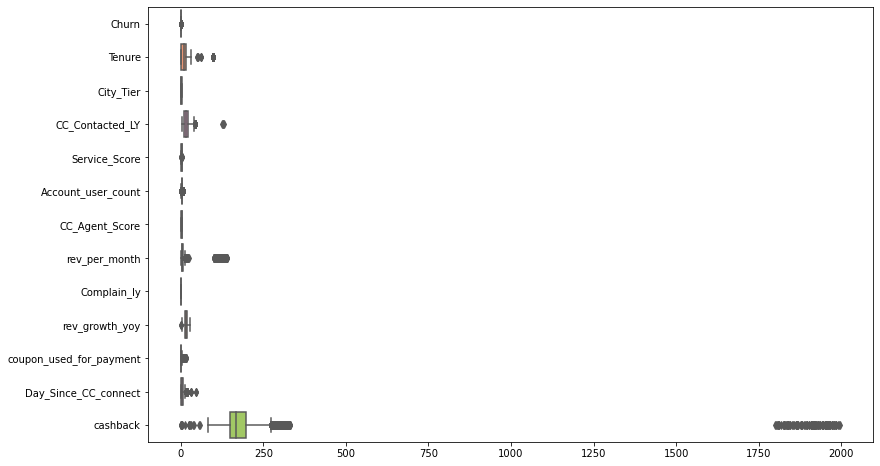

In [68]:
plt.figure(figsize=(13,8))
sns.boxplot(data=ds,orient="h", palette="Set2")

In [69]:
for column in ds.columns:
    if ds[column].dtype=='object':
        print(column.upper(),': ',ds[column].nunique())
        print(ds[column].value_counts().sort_values())
        print('\n')

PAYMENT :  6
No_info              109
UPI                  794
Cash on Delivery     976
E wallet            1194
Credit Card         3440
Debit Card          4482
Name: Payment, dtype: int64


GENDER :  3
No_info     108
Female     4343
Male       6544
Name: Gender, dtype: int64


ACCOUNT_SEGMENT :  6
No_info           97
Regular          511
Super Plus       803
HNI             1614
Super           3959
Regular Plus    4011
Name: account_segment, dtype: int64


MARITAL_STATUS :  4
No_info      211
Divorced    1668
Single      3409
Married     5707
Name: Marital_Status, dtype: int64


LOGIN_DEVICE :  4
No_info      221
Both         539
Computer    2930
Mobile      7305
Name: Login_device, dtype: int64




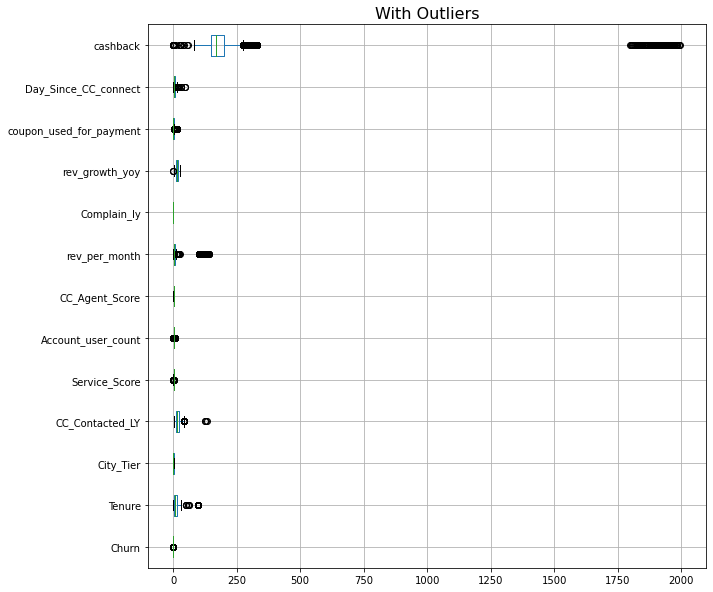

In [70]:
cont=ds.dtypes[(ds.dtypes!='uint8') & (ds.dtypes!='bool')].index
plt.figure(figsize=(10,10))
ds[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [71]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [72]:
ds.Churn.value_counts()

0    9144
1    1851
Name: Churn, dtype: int64

In [73]:
for feature in ds[['cashback','Day_Since_CC_connect','coupon_used_for_payment','rev_growth_yoy','rev_per_month','Account_user_count','Tenure','CC_Contacted_LY','Service_Score']]:
    lr,ur=remove_outlier(ds[feature])
    ds[feature]=np.where(ds[feature]>ur,ur,ds[feature])
    ds[feature]=np.where(ds[feature]<lr,lr,ds[feature])

In [74]:
ds.Churn.value_counts()

0    9144
1    1851
Name: Churn, dtype: int64

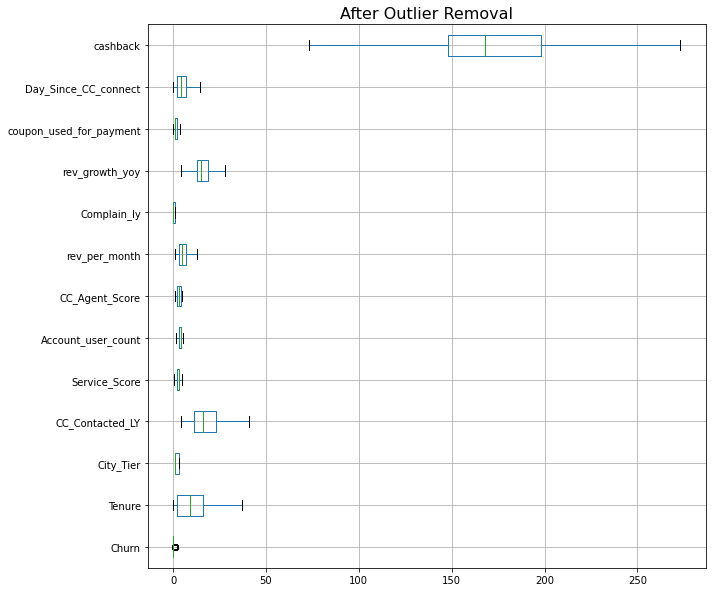

In [75]:
plt.figure(figsize=(10,10))
ds[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

C:\Users\dheepig\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

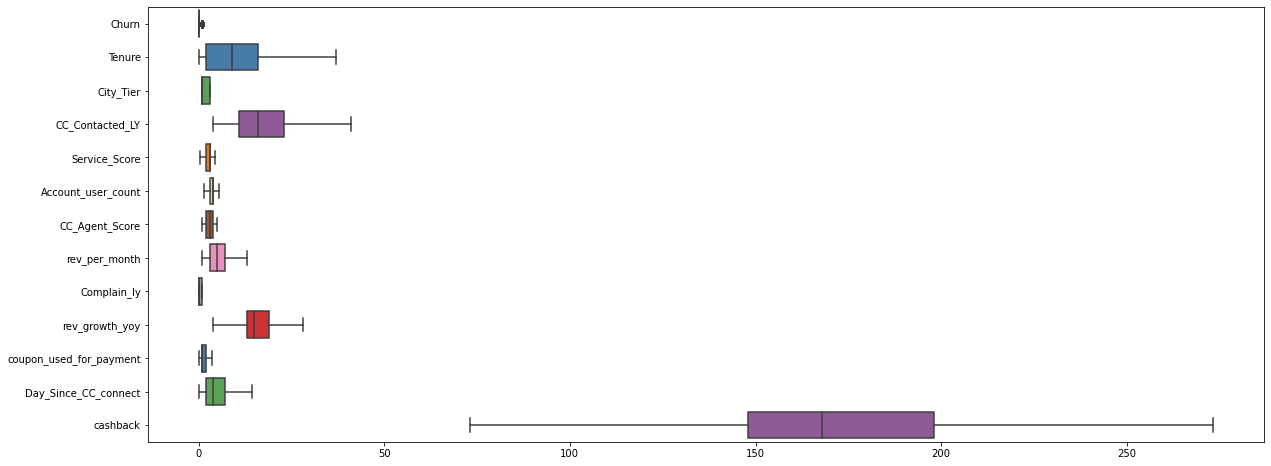

In [76]:
plt.figure(figsize=(20,8))
sns.boxplot(data=ds,orient="h",palette="Set1")

In [77]:
ds.Churn.value_counts()

0    9144
1    1851
Name: Churn, dtype: int64

# e) Variable transformation (if applicable)

In [78]:
ds1 = pd.get_dummies(ds,columns=['Marital_Status'],drop_first=True)  

In [79]:
ds1.head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Marital_Status_Married,Marital_Status_No_info,Marital_Status_Single
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.000000,Super,2.0,9.0,1.0,11.0,1.0,5.0,159.930000,Mobile,0,0,1
1,1,0.0,1.0,8.0,UPI,Male,3.0,4.000000,Regular Plus,3.0,7.0,1.0,15.0,0.0,0.0,120.900000,Mobile,0,0,1
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.000000,Regular Plus,3.0,6.0,1.0,14.0,0.0,3.0,196.199993,Mobile,0,0,1
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.000000,Super,5.0,8.0,0.0,23.0,0.0,3.0,134.070000,Mobile,0,0,1
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.000000,Regular Plus,5.0,3.0,0.0,11.0,1.0,3.0,129.600000,Mobile,0,0,1
5,1,0.0,1.0,22.0,Debit Card,Female,3.0,3.582885,Regular Plus,5.0,2.0,1.0,22.0,3.5,7.0,139.190000,Computer,0,0,1
6,1,2.0,3.0,11.0,Cash on Delivery,Male,2.0,3.000000,Super,2.0,4.0,0.0,14.0,0.0,0.0,120.860000,Mobile,0,0,0
7,1,0.0,1.0,6.0,Credit Card,Male,3.0,3.000000,Regular Plus,2.0,3.0,1.0,16.0,2.0,0.0,122.930000,Mobile,0,0,0
8,1,13.0,3.0,9.0,E wallet,Male,2.0,4.000000,Regular Plus,3.0,2.0,1.0,14.0,0.0,2.0,126.830000,Mobile,0,0,0
9,1,0.0,1.0,31.0,Debit Card,Male,2.0,5.000000,Regular Plus,3.0,2.0,0.0,12.0,1.0,1.0,122.930000,Mobile,0,0,1


In [80]:
ds1.Churn.value_counts()

0    9144
1    1851
Name: Churn, dtype: int64

In [81]:
ds1 = pd.get_dummies(ds1,columns=['Payment'],drop_first=False)

In [82]:
#type_dummies = pd.get_dummies(ds,columns=['Marital_Status','Payment'],drop_first=True)  
#ds1 = pd.concat([ds,type_dummies],axis=1)

In [83]:
ds1.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,...,Login_device,Marital_Status_Married,Marital_Status_No_info,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_No_info,Payment_UPI
0,1,4.0,3.0,6.0,Female,3.0,3.0,Super,2.0,9.0,...,Mobile,0,0,1,0,0,1,0,0,0
1,1,0.0,1.0,8.0,Male,3.0,4.0,Regular Plus,3.0,7.0,...,Mobile,0,0,1,0,0,0,0,0,1
2,1,0.0,1.0,30.0,Male,2.0,4.0,Regular Plus,3.0,6.0,...,Mobile,0,0,1,0,0,1,0,0,0
3,1,0.0,3.0,15.0,Male,2.0,4.0,Super,5.0,8.0,...,Mobile,0,0,1,0,0,1,0,0,0
4,1,0.0,1.0,12.0,Male,2.0,3.0,Regular Plus,5.0,3.0,...,Mobile,0,0,1,0,1,0,0,0,0


In [84]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10995 entries, 0 to 11259
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     10995 non-null  int64  
 1   Tenure                    10995 non-null  float64
 2   City_Tier                 10995 non-null  float64
 3   CC_Contacted_LY           10995 non-null  float64
 4   Gender                    10995 non-null  object 
 5   Service_Score             10995 non-null  float64
 6   Account_user_count        10995 non-null  float64
 7   account_segment           10995 non-null  object 
 8   CC_Agent_Score            10995 non-null  float64
 9   rev_per_month             10995 non-null  float64
 10  Complain_ly               10995 non-null  float64
 11  rev_growth_yoy            10995 non-null  float64
 12  coupon_used_for_payment   10995 non-null  float64
 13  Day_Since_CC_connect      10995 non-null  float64
 14  cashba

In [85]:
ds1.head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,...,Login_device,Marital_Status_Married,Marital_Status_No_info,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_No_info,Payment_UPI
0,1,4.0,3.0,6.0,Female,3.0,3.000000,Super,2.0,9.0,...,Mobile,0,0,1,0,0,1,0,0,0
1,1,0.0,1.0,8.0,Male,3.0,4.000000,Regular Plus,3.0,7.0,...,Mobile,0,0,1,0,0,0,0,0,1
2,1,0.0,1.0,30.0,Male,2.0,4.000000,Regular Plus,3.0,6.0,...,Mobile,0,0,1,0,0,1,0,0,0
3,1,0.0,3.0,15.0,Male,2.0,4.000000,Super,5.0,8.0,...,Mobile,0,0,1,0,0,1,0,0,0
4,1,0.0,1.0,12.0,Male,2.0,3.000000,Regular Plus,5.0,3.0,...,Mobile,0,0,1,0,1,0,0,0,0
5,1,0.0,1.0,22.0,Female,3.0,3.582885,Regular Plus,5.0,2.0,...,Computer,0,0,1,0,0,1,0,0,0
6,1,2.0,3.0,11.0,Male,2.0,3.000000,Super,2.0,4.0,...,Mobile,0,0,0,1,0,0,0,0,0
7,1,0.0,1.0,6.0,Male,3.0,3.000000,Regular Plus,2.0,3.0,...,Mobile,0,0,0,0,1,0,0,0,0
8,1,13.0,3.0,9.0,Male,2.0,4.000000,Regular Plus,3.0,2.0,...,Mobile,0,0,0,0,0,0,1,0,0
9,1,0.0,1.0,31.0,Male,2.0,5.000000,Regular Plus,3.0,2.0,...,Mobile,0,0,1,0,0,1,0,0,0


In [86]:
ds1.Churn.value_counts()

0    9144
1    1851
Name: Churn, dtype: int64

In [87]:
le = LabelEncoder()
ds1[['account_segment','Gender']] = ds1[['account_segment','Gender']].apply(LabelEncoder().fit_transform)

In [88]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10995 entries, 0 to 11259
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     10995 non-null  int64  
 1   Tenure                    10995 non-null  float64
 2   City_Tier                 10995 non-null  float64
 3   CC_Contacted_LY           10995 non-null  float64
 4   Gender                    10995 non-null  int32  
 5   Service_Score             10995 non-null  float64
 6   Account_user_count        10995 non-null  float64
 7   account_segment           10995 non-null  int32  
 8   CC_Agent_Score            10995 non-null  float64
 9   rev_per_month             10995 non-null  float64
 10  Complain_ly               10995 non-null  float64
 11  rev_growth_yoy            10995 non-null  float64
 12  coupon_used_for_payment   10995 non-null  float64
 13  Day_Since_CC_connect      10995 non-null  float64
 14  cashba

In [89]:
ds1.head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,...,Login_device,Marital_Status_Married,Marital_Status_No_info,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_No_info,Payment_UPI
0,1,4.0,3.0,6.0,0,3.0,3.000000,4,2.0,9.0,...,Mobile,0,0,1,0,0,1,0,0,0
1,1,0.0,1.0,8.0,1,3.0,4.000000,3,3.0,7.0,...,Mobile,0,0,1,0,0,0,0,0,1
2,1,0.0,1.0,30.0,1,2.0,4.000000,3,3.0,6.0,...,Mobile,0,0,1,0,0,1,0,0,0
3,1,0.0,3.0,15.0,1,2.0,4.000000,4,5.0,8.0,...,Mobile,0,0,1,0,0,1,0,0,0
4,1,0.0,1.0,12.0,1,2.0,3.000000,3,5.0,3.0,...,Mobile,0,0,1,0,1,0,0,0,0
5,1,0.0,1.0,22.0,0,3.0,3.582885,3,5.0,2.0,...,Computer,0,0,1,0,0,1,0,0,0
6,1,2.0,3.0,11.0,1,2.0,3.000000,4,2.0,4.0,...,Mobile,0,0,0,1,0,0,0,0,0
7,1,0.0,1.0,6.0,1,3.0,3.000000,3,2.0,3.0,...,Mobile,0,0,0,0,1,0,0,0,0
8,1,13.0,3.0,9.0,1,2.0,4.000000,3,3.0,2.0,...,Mobile,0,0,0,0,0,0,1,0,0
9,1,0.0,1.0,31.0,1,2.0,5.000000,3,3.0,2.0,...,Mobile,0,0,1,0,0,1,0,0,0


In [90]:
ds1 = ds1.drop(columns=["Marital_Status_No_info","Payment_No_info"])
ds1.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,...,Day_Since_CC_connect,cashback,Login_device,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI
0,1,4.0,3.0,6.0,0,3.0,3.0,4,2.0,9.0,...,5.0,159.930000,Mobile,0,1,0,0,1,0,0
1,1,0.0,1.0,8.0,1,3.0,4.0,3,3.0,7.0,...,0.0,120.900000,Mobile,0,1,0,0,0,0,1
2,1,0.0,1.0,30.0,1,2.0,4.0,3,3.0,6.0,...,3.0,196.199993,Mobile,0,1,0,0,1,0,0
3,1,0.0,3.0,15.0,1,2.0,4.0,4,5.0,8.0,...,3.0,134.070000,Mobile,0,1,0,0,1,0,0
4,1,0.0,1.0,12.0,1,2.0,3.0,3,5.0,3.0,...,3.0,129.600000,Mobile,0,1,0,1,0,0,0


In [91]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10995 entries, 0 to 11259
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     10995 non-null  int64  
 1   Tenure                    10995 non-null  float64
 2   City_Tier                 10995 non-null  float64
 3   CC_Contacted_LY           10995 non-null  float64
 4   Gender                    10995 non-null  int32  
 5   Service_Score             10995 non-null  float64
 6   Account_user_count        10995 non-null  float64
 7   account_segment           10995 non-null  int32  
 8   CC_Agent_Score            10995 non-null  float64
 9   rev_per_month             10995 non-null  float64
 10  Complain_ly               10995 non-null  float64
 11  rev_growth_yoy            10995 non-null  float64
 12  coupon_used_for_payment   10995 non-null  float64
 13  Day_Since_CC_connect      10995 non-null  float64
 14  cashba

In [92]:
ds1.Churn.value_counts()

0    9144
1    1851
Name: Churn, dtype: int64

In [93]:
for column in ds1.columns:
    if ds1[column].dtype=='object':
        print(column.upper(),': ',ds1[column].nunique())
        print(ds1[column].value_counts().sort_values())
        print('\n')

LOGIN_DEVICE :  4
No_info      221
Both         539
Computer    2930
Mobile      7305
Name: Login_device, dtype: int64




# f) Addition of new variables (if required)

In [94]:
# Not required for now, we shall add when building the model.

## Notes Week - 2 

# Question 1 Model building and interpretation

# a) Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)

In [95]:
for feature in ds1.columns:
    if ds1[feature].dtype == 'object':
        ds1[feature]=pd.Categorical(ds1[feature]).codes

In [96]:
ds1.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Login_device', 'Marital_Status_Married', 'Marital_Status_Single',
       'Payment_Cash on Delivery', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI'],
      dtype='object')

In [97]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10995 entries, 0 to 11259
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     10995 non-null  int64  
 1   Tenure                    10995 non-null  float64
 2   City_Tier                 10995 non-null  float64
 3   CC_Contacted_LY           10995 non-null  float64
 4   Gender                    10995 non-null  int32  
 5   Service_Score             10995 non-null  float64
 6   Account_user_count        10995 non-null  float64
 7   account_segment           10995 non-null  int32  
 8   CC_Agent_Score            10995 non-null  float64
 9   rev_per_month             10995 non-null  float64
 10  Complain_ly               10995 non-null  float64
 11  rev_growth_yoy            10995 non-null  float64
 12  coupon_used_for_payment   10995 non-null  float64
 13  Day_Since_CC_connect      10995 non-null  float64
 14  cashba

In [98]:
ds1.Churn.value_counts()

0    9144
1    1851
Name: Churn, dtype: int64

In [99]:
ds2 = ds1.drop(columns=["Churn"])
ds2.head()

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,Day_Since_CC_connect,cashback,Login_device,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI
0,4.0,3.0,6.0,0,3.0,3.0,4,2.0,9.0,1.0,...,5.0,159.930000,2,0,1,0,0,1,0,0
1,0.0,1.0,8.0,1,3.0,4.0,3,3.0,7.0,1.0,...,0.0,120.900000,2,0,1,0,0,0,0,1
2,0.0,1.0,30.0,1,2.0,4.0,3,3.0,6.0,1.0,...,3.0,196.199993,2,0,1,0,0,1,0,0
3,0.0,3.0,15.0,1,2.0,4.0,4,5.0,8.0,0.0,...,3.0,134.070000,2,0,1,0,0,1,0,0
4,0.0,1.0,12.0,1,2.0,3.0,3,5.0,3.0,0.0,...,3.0,129.600000,2,0,1,0,1,0,0,0


In [100]:
ds2.head()

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,Day_Since_CC_connect,cashback,Login_device,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI
0,4.0,3.0,6.0,0,3.0,3.0,4,2.0,9.0,1.0,...,5.0,159.930000,2,0,1,0,0,1,0,0
1,0.0,1.0,8.0,1,3.0,4.0,3,3.0,7.0,1.0,...,0.0,120.900000,2,0,1,0,0,0,0,1
2,0.0,1.0,30.0,1,2.0,4.0,3,3.0,6.0,1.0,...,3.0,196.199993,2,0,1,0,0,1,0,0
3,0.0,3.0,15.0,1,2.0,4.0,4,5.0,8.0,0.0,...,3.0,134.070000,2,0,1,0,0,1,0,0
4,0.0,1.0,12.0,1,2.0,3.0,3,5.0,3.0,0.0,...,3.0,129.600000,2,0,1,0,1,0,0,0


In [101]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10995 entries, 0 to 11259
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    10995 non-null  float64
 1   City_Tier                 10995 non-null  float64
 2   CC_Contacted_LY           10995 non-null  float64
 3   Gender                    10995 non-null  int32  
 4   Service_Score             10995 non-null  float64
 5   Account_user_count        10995 non-null  float64
 6   account_segment           10995 non-null  int32  
 7   CC_Agent_Score            10995 non-null  float64
 8   rev_per_month             10995 non-null  float64
 9   Complain_ly               10995 non-null  float64
 10  rev_growth_yoy            10995 non-null  float64
 11  coupon_used_for_payment   10995 non-null  float64
 12  Day_Since_CC_connect      10995 non-null  float64
 13  cashback                  10995 non-null  float64
 14  Login_

In [102]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(ds2)
scaled_data

array([[-0.69101993,  1.47655156, -1.38311521, ...,  1.20546502,
        -0.34903338, -0.27899015],
       [-1.13687935, -0.71839846, -1.14983148, ..., -0.82955539,
        -0.34903338,  3.58435588],
       [-1.13687935, -0.71839846,  1.41628959, ...,  1.20546502,
        -0.34903338, -0.27899015],
       ...,
       [-1.0254145 , -0.71839846, -0.44998028, ...,  1.20546502,
        -0.34903338, -0.27899015],
       [ 1.42681231,  1.47655156, -0.79990588, ..., -0.82955539,
        -0.34903338, -0.27899015],
       [-0.24516051, -0.71839846,  0.48315466, ..., -0.82955539,
        -0.34903338, -0.27899015]])

In [103]:
scaled_data=pd.DataFrame(scaled_data,index=ds2.index,columns=ds2.columns)
scaled_data.head()

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,Day_Since_CC_connect,cashback,Login_device,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI
0,-0.691020,1.476552,-1.383115,-1.214063,0.137266,-0.633496,0.696419,-0.770379,1.256006,1.607634,...,0.111334,-0.432848,0.570853,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990
1,-1.136879,-0.718398,-1.149831,0.760585,0.137266,0.370107,-0.001142,-0.042045,0.564586,1.607634,...,-1.325054,-1.318866,0.570853,-1.038863,1.491739,-0.312114,-0.674780,-0.829555,-0.349033,3.584356
2,-1.136879,-0.718398,1.416290,0.760585,-1.249835,0.370107,-0.001142,-0.042045,0.218877,1.607634,...,-0.463221,0.390516,0.570853,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990
3,-1.136879,1.476552,-0.333338,0.760585,-1.249835,0.370107,0.696419,1.414624,0.910296,-0.642892,...,-0.463221,-1.019894,0.570853,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990
4,-1.136879,-0.718398,-0.683264,0.760585,-1.249835,-0.633496,-0.001142,1.414624,-0.818252,-0.642892,...,-0.463221,-1.121368,0.570853,-1.038863,1.491739,-0.312114,1.481965,-0.829555,-0.349033,-0.278990


In [104]:
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,10995.0,7.237907e-17,1.000045,-1.136879,-0.913950,-0.133696,0.646558,2.987320
City_Tier,10995.0,1.752931e-16,1.000045,-0.718398,-0.718398,-0.718398,1.476552,1.476552
CC_Contacted_LY,10995.0,-1.550980e-16,1.000045,-1.616399,-0.799906,-0.216697,0.599797,2.699350
Gender,10995.0,3.764358e-17,1.000045,-1.214063,-1.214063,0.760585,0.760585,2.735233
Service_Score,10995.0,3.929149e-16,1.000045,-3.330487,-1.249835,0.137266,0.137266,2.217918
Account_user_count,10995.0,-3.308757e-16,1.000045,-2.138901,-0.633496,0.370107,0.370107,1.875512
account_segment,10995.0,8.255738e-17,1.000045,-2.093825,-0.001142,-0.001142,0.696419,1.393980
CC_Agent_Score,10995.0,-7.884149e-17,1.000045,-1.498713,-0.770379,-0.042045,0.686289,1.414624
rev_per_month,10995.0,0.000000e+00,1.000045,-1.509671,-0.818252,-0.126833,0.564586,2.638844
Complain_ly,10995.0,-1.357108e-17,1.000045,-0.642892,-0.642892,-0.642892,1.607634,1.607634


In [105]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10995 entries, 0 to 11259
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    10995 non-null  float64
 1   City_Tier                 10995 non-null  float64
 2   CC_Contacted_LY           10995 non-null  float64
 3   Gender                    10995 non-null  float64
 4   Service_Score             10995 non-null  float64
 5   Account_user_count        10995 non-null  float64
 6   account_segment           10995 non-null  float64
 7   CC_Agent_Score            10995 non-null  float64
 8   rev_per_month             10995 non-null  float64
 9   Complain_ly               10995 non-null  float64
 10  rev_growth_yoy            10995 non-null  float64
 11  coupon_used_for_payment   10995 non-null  float64
 12  Day_Since_CC_connect      10995 non-null  float64
 13  cashback                  10995 non-null  float64
 14  Login_

### Apply hierarchical clustering to scaled data

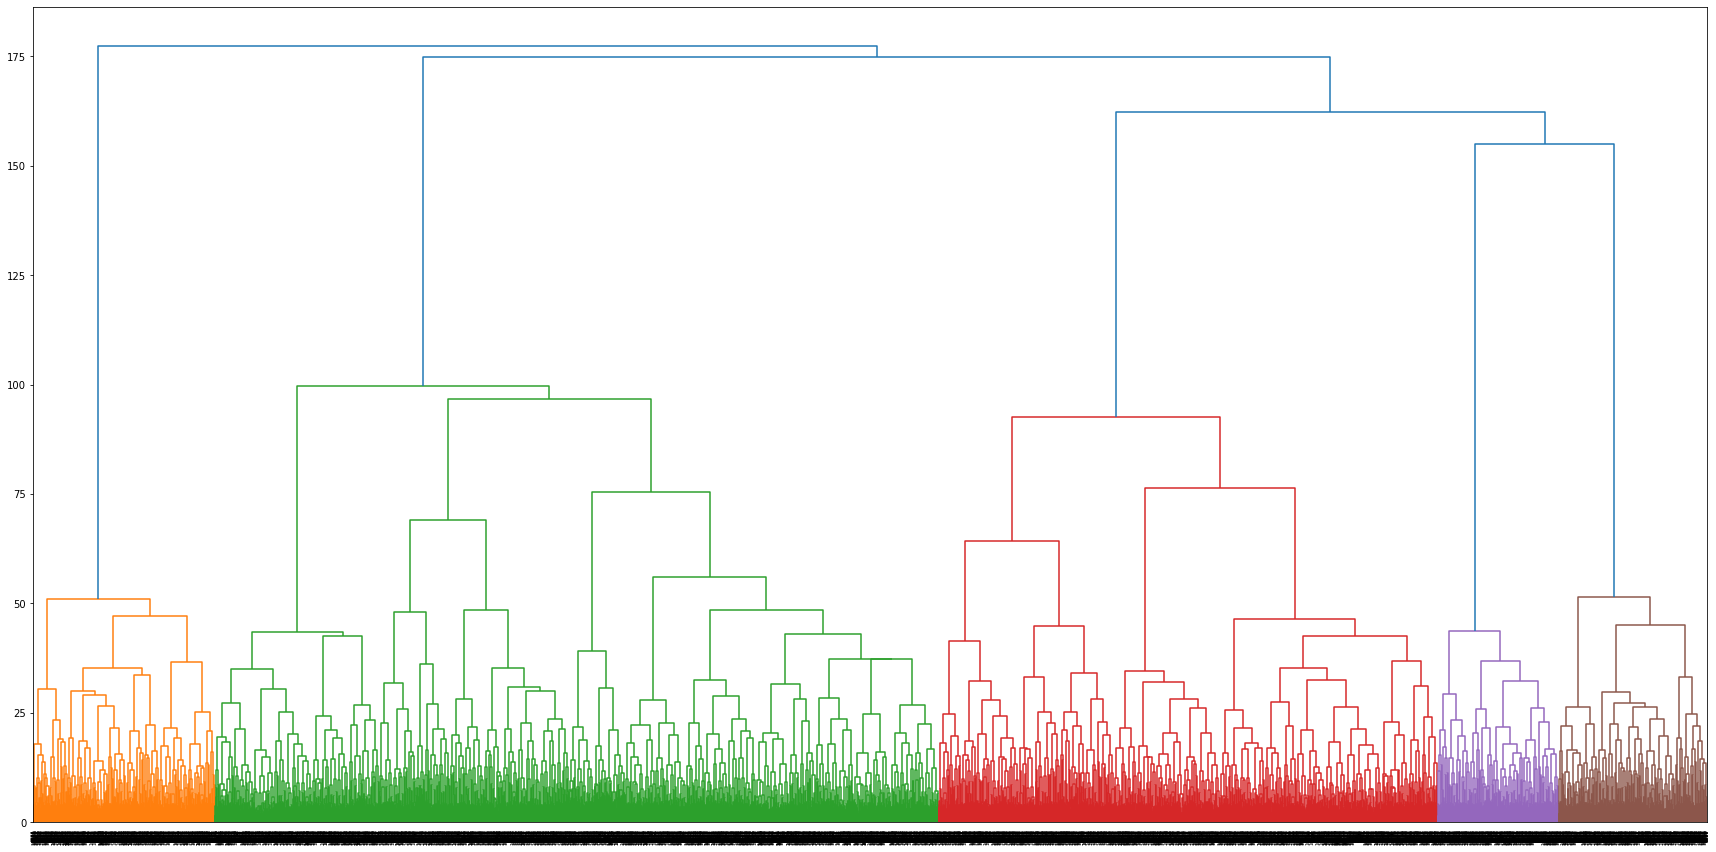

In [106]:
plt.figure(figsize=(30,15))
wardlink=linkage(scaled_data,method='ward')
dend=dendrogram(wardlink)

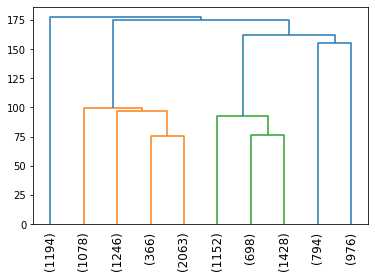

In [107]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=10,leaf_rotation=90,leaf_font_size=12)

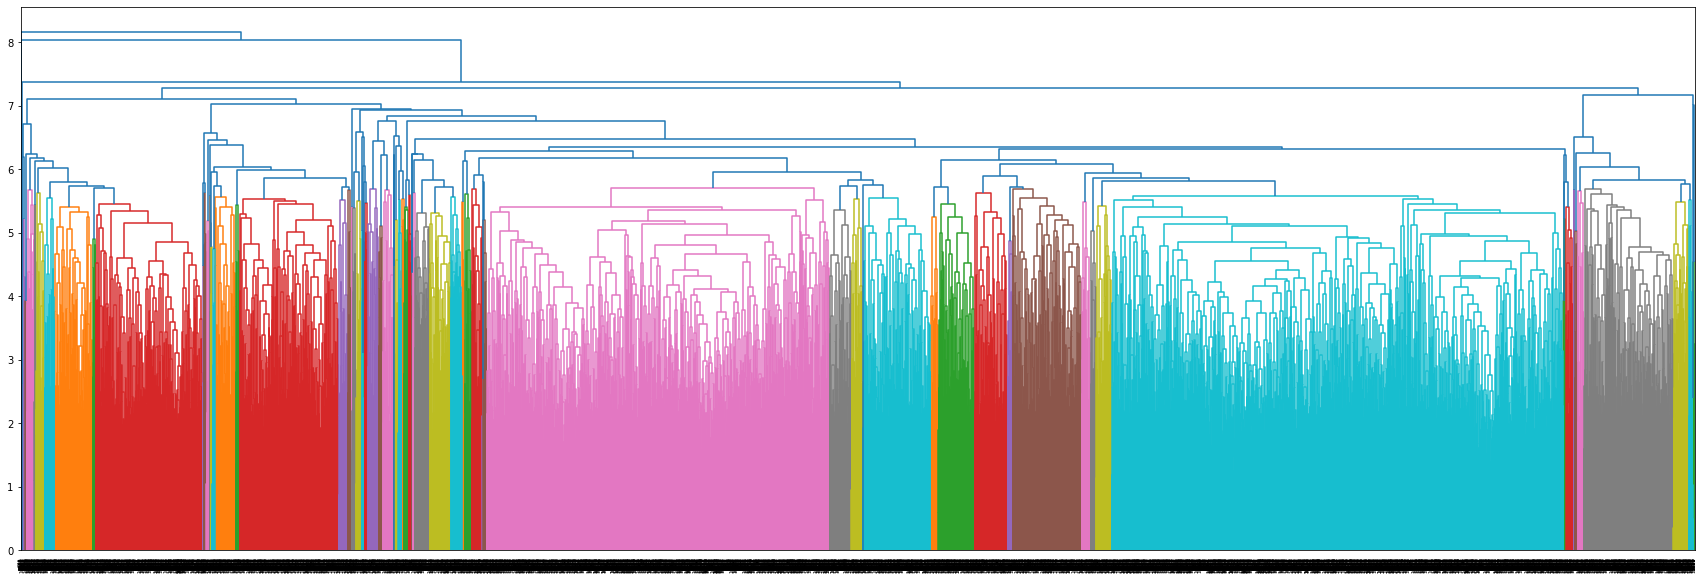

In [108]:
plt.figure(figsize=(30,10))
link_method = linkage(scaled_data,method = 'average')
dend = dendrogram(link_method)

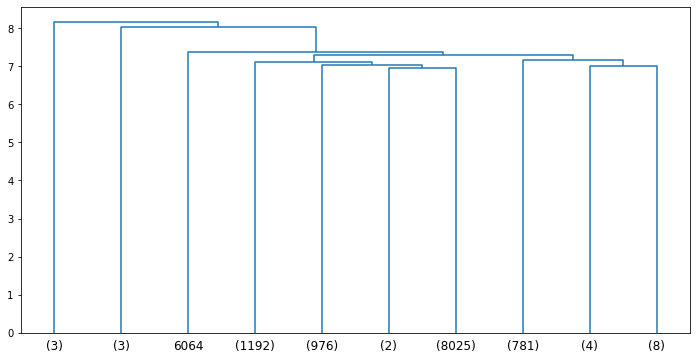

In [109]:
plt.figure(figsize=(12,6))
dend = dendrogram(link_method , truncate_mode= 'lastp', p =10)

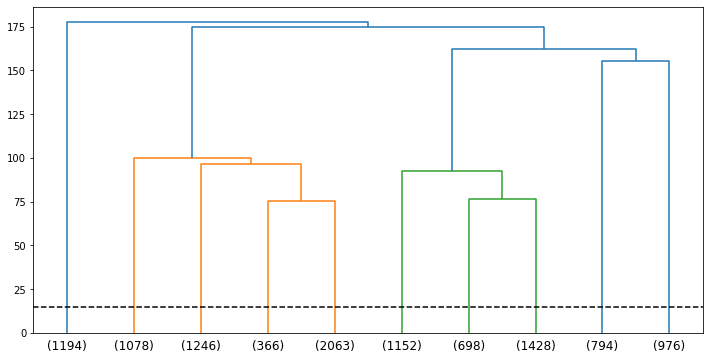

In [110]:
plt.figure(figsize=(12,6))
dend_ward = dendrogram(wardlink , truncate_mode= 'lastp', p =10)
plt.axhline(y = 15 , color = 'black', linestyle = '--')

In [111]:
clusters=fcluster(wardlink,3,criterion='maxclust')
clusters

array([2, 3, 2, ..., 2, 3, 3], dtype=int32)

In [112]:
clusters_1=fcluster(wardlink,25,criterion='distance')
clusters_1

array([17, 79, 35, ..., 36, 66, 70], dtype=int32)

In [113]:
scaled_data["clusters"]=clusters
scaled_data.head(5)

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,cashback,Login_device,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,clusters
0,-0.691020,1.476552,-1.383115,-1.214063,0.137266,-0.633496,0.696419,-0.770379,1.256006,1.607634,...,-0.432848,0.570853,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2
1,-1.136879,-0.718398,-1.149831,0.760585,0.137266,0.370107,-0.001142,-0.042045,0.564586,1.607634,...,-1.318866,0.570853,-1.038863,1.491739,-0.312114,-0.674780,-0.829555,-0.349033,3.584356,3
2,-1.136879,-0.718398,1.416290,0.760585,-1.249835,0.370107,-0.001142,-0.042045,0.218877,1.607634,...,0.390516,0.570853,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2
3,-1.136879,1.476552,-0.333338,0.760585,-1.249835,0.370107,0.696419,1.414624,0.910296,-0.642892,...,-1.019894,0.570853,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2
4,-1.136879,-0.718398,-0.683264,0.760585,-1.249835,-0.633496,-0.001142,1.414624,-0.818252,-0.642892,...,-1.121368,0.570853,-1.038863,1.491739,-0.312114,1.481965,-0.829555,-0.349033,-0.278990,3


In [114]:
scaled_data.clusters.value_counts().sort_index()

1    1194
2    4753
3    5048
Name: clusters, dtype: int64

In [115]:
agg_data_1=scaled_data.groupby('clusters').mean()
agg_data_1['Freq']=scaled_data.clusters.value_counts().sort_index()
agg_data_1

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,cashback,Login_device,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Freq
clusters,,,,,,,,,,,,,,,,,,,,,
1,0.034648,1.461705,0.105779,-0.063012,0.009505,0.062326,-0.014579,0.052543,-0.040284,0.021635,...,0.196107,0.093348,-0.002934,-0.058307,-0.312114,-0.674780,-0.829555,2.865055,-0.278990,1194
2,0.007036,-0.144057,-0.022376,0.026480,0.014756,-0.056247,0.019698,-0.062702,0.009693,-0.021423,...,-0.010596,-0.105632,-0.008449,0.029264,-0.312114,-0.590833,1.084725,-0.349033,-0.278990,4753
3,-0.014820,-0.210098,-0.003951,-0.010028,-0.016142,0.038218,-0.015099,0.046610,0.000402,0.015054,...,-0.036408,0.077379,0.008649,-0.013763,0.367698,0.715911,-0.825121,-0.349033,0.328676,5048


### Applying K-Means clustering on scaled data and determine optimum clusters

In [116]:
k_means = KMeans(n_clusters= 2)

In [117]:
k_means.fit(scaled_data)

KMeans(n_clusters=2)

In [118]:
k_means.labels_

array([1, 0, 1, ..., 1, 0, 0])

In [119]:
k_means.inertia_

226814.0616695885

In [120]:
k_means= KMeans(n_clusters=3)
k_means.fit(scaled_data)
k_means.inertia_

209724.15954049892

In [121]:
k_means= KMeans(n_clusters=4)
k_means.fit(scaled_data)
k_means.inertia_

196330.63409621027

In [122]:
k_means= KMeans(n_clusters=1)
k_means.fit(scaled_data)
k_means.inertia_

246781.0844929508

In [123]:
k_means= KMeans(n_clusters=5)
k_means.fit(scaled_data)
k_means.inertia_

189122.56737235028

In [124]:
wss=[]

In [125]:
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(scaled_data)
    wss.append(KM.inertia_)

In [126]:
wss

[246781.0844929508,
 226813.99021109374,
 209724.15954049892,
 196330.63409621027,
 184305.70228061284,
 177119.67619701146,
 171868.44272499785,
 167421.0231894934,
 163773.0341003686,
 161294.04791311437]

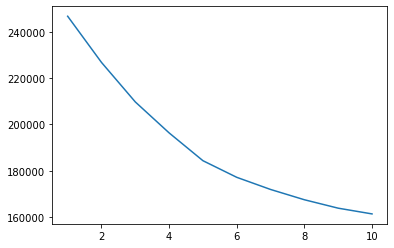

In [127]:
plt.plot(range(1,11),wss)

In [128]:
k_means= KMeans(n_clusters=3)
k_means.fit(scaled_data)
k_means.labels_

array([2, 0, 2, ..., 2, 0, 0])

In [129]:
k_means= KMeans(n_clusters=3)
k_means.fit(scaled_data)
labels=k_means.labels_

In [130]:
scaled_data["Clus_kmeans"]=labels
scaled_data.head()

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,Login_device,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,clusters,Clus_kmeans
0,-0.691020,1.476552,-1.383115,-1.214063,0.137266,-0.633496,0.696419,-0.770379,1.256006,1.607634,...,0.570853,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1
1,-1.136879,-0.718398,-1.149831,0.760585,0.137266,0.370107,-0.001142,-0.042045,0.564586,1.607634,...,0.570853,-1.038863,1.491739,-0.312114,-0.674780,-0.829555,-0.349033,3.584356,3,0
2,-1.136879,-0.718398,1.416290,0.760585,-1.249835,0.370107,-0.001142,-0.042045,0.218877,1.607634,...,0.570853,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1
3,-1.136879,1.476552,-0.333338,0.760585,-1.249835,0.370107,0.696419,1.414624,0.910296,-0.642892,...,0.570853,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1
4,-1.136879,-0.718398,-0.683264,0.760585,-1.249835,-0.633496,-0.001142,1.414624,-0.818252,-0.642892,...,0.570853,-1.038863,1.491739,-0.312114,1.481965,-0.829555,-0.349033,-0.278990,3,0


In [131]:
silhouette_score(scaled_data,labels)

0.1150517239130849

In [132]:
sil_width=silhouette_samples(scaled_data,labels)
sil_width

array([0.15856634, 0.03382048, 0.16767638, ..., 0.17102009, 0.05732072,
       0.08142502])

In [133]:
scaled_data["sil_width"]=sil_width
scaled_data.head()

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,clusters,Clus_kmeans,sil_width
0,-0.691020,1.476552,-1.383115,-1.214063,0.137266,-0.633496,0.696419,-0.770379,1.256006,1.607634,...,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1,0.158566
1,-1.136879,-0.718398,-1.149831,0.760585,0.137266,0.370107,-0.001142,-0.042045,0.564586,1.607634,...,-1.038863,1.491739,-0.312114,-0.674780,-0.829555,-0.349033,3.584356,3,0,0.033820
2,-1.136879,-0.718398,1.416290,0.760585,-1.249835,0.370107,-0.001142,-0.042045,0.218877,1.607634,...,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1,0.167676
3,-1.136879,1.476552,-0.333338,0.760585,-1.249835,0.370107,0.696419,1.414624,0.910296,-0.642892,...,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1,0.149369
4,-1.136879,-0.718398,-0.683264,0.760585,-1.249835,-0.633496,-0.001142,1.414624,-0.818252,-0.642892,...,-1.038863,1.491739,-0.312114,1.481965,-0.829555,-0.349033,-0.278990,3,0,0.068580


In [134]:
from sklearn.datasets import make_blobs
X,Y = make_blobs()
no_of_clusters=[2,3,4,5,6]
for n_clusters in no_of_clusters:
    cluster=KMeans(n_clusters=n_clusters)
    cluster_labels=cluster.fit_predict(X)
    silhouette_average=silhouette_score(X,cluster_labels)
    print("For no of clusters =",n_clusters,"The average silhouette score is :",silhouette_average)

For no of clusters = 2 The average silhouette score is : 0.7459785092167452
For no of clusters = 3 The average silhouette score is : 0.8019549738548842
For no of clusters = 4 The average silhouette score is : 0.6776056486344564
For no of clusters = 5 The average silhouette score is : 0.5379358723610994
For no of clusters = 6 The average silhouette score is : 0.3583314440086044


In [135]:
silhouette_samples(scaled_data,labels).min()

-0.039578625743124304

In [136]:
agg_data_2=scaled_data.groupby('Clus_kmeans').mean()
agg_data_2['Freq']=scaled_data.Clus_kmeans.value_counts().sort_index()
agg_data_2

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,clusters,sil_width,Freq
Clus_kmeans,,,,,,,,,,,,,,,,,,,,,
0,-0.022805,-0.205530,0.004266,0.011043,-0.020891,-0.010329,-0.015043,0.040870,0.012904,0.004319,...,0.014732,-0.011445,0.333062,0.720069,-0.829555,-0.349033,0.297715,2.946983,0.050456,5319
1,0.017833,-0.145485,-0.033242,0.003681,0.022260,-0.004345,0.021737,-0.062500,-0.004582,-0.010889,...,-0.016701,0.029115,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2.002454,0.161979,4482
2,0.034648,1.461705,0.105779,-0.063012,0.009505,0.062326,-0.014579,0.052543,-0.040284,0.021635,...,-0.002934,-0.058307,-0.312114,-0.674780,-0.829555,2.865055,-0.278990,1.000000,0.226656,1194


In [137]:
scaled_data.to_csv('customer_churn_scaled_data.csv')

In [138]:
scaled_data["clusters"]=clusters
scaled_data.clusters.value_counts().sort_index()

1    1194
2    4753
3    5048
Name: clusters, dtype: int64

In [139]:
agg_data_1=scaled_data.groupby('clusters').mean()
agg_data_1['Freq']=scaled_data.clusters.value_counts().sort_index()
agg_data_1.T

clusters,1,2,3
Tenure,0.034648,0.007036,-0.014820
City_Tier,1.461705,-0.144057,-0.210098
CC_Contacted_LY,0.105779,-0.022376,-0.003951
Gender,-0.063012,0.026480,-0.010028
Service_Score,0.009505,0.014756,-0.016142
Account_user_count,0.062326,-0.056247,0.038218
account_segment,-0.014579,0.019698,-0.015099
CC_Agent_Score,0.052543,-0.062702,0.046610
rev_per_month,-0.040284,0.009693,0.000402
Complain_ly,0.021635,-0.021423,0.015054


In [140]:
scaled_data.Clus_kmeans.value_counts().sort_index()

0    5319
1    4482
2    1194
Name: Clus_kmeans, dtype: int64

In [141]:
agg_data_2=scaled_data.groupby('Clus_kmeans').mean()
agg_data_2['Freq']=scaled_data.Clus_kmeans.value_counts().sort_index()
agg_data_2.T

Clus_kmeans,0,1,2
Tenure,-0.022805,0.017833,0.034648
City_Tier,-0.205530,-0.145485,1.461705
CC_Contacted_LY,0.004266,-0.033242,0.105779
Gender,0.011043,0.003681,-0.063012
Service_Score,-0.020891,0.022260,0.009505
Account_user_count,-0.010329,-0.004345,0.062326
account_segment,-0.015043,0.021737,-0.014579
CC_Agent_Score,0.040870,-0.062500,0.052543
rev_per_month,0.012904,-0.004582,-0.040284
Complain_ly,0.004319,-0.010889,0.021635


### Splitting data into training and test set

In [142]:
ds3 = pd.concat([scaled_data,ds1["Churn"]],axis=1,join='inner')
ds3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10995 entries, 0 to 11259
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    10995 non-null  float64
 1   City_Tier                 10995 non-null  float64
 2   CC_Contacted_LY           10995 non-null  float64
 3   Gender                    10995 non-null  float64
 4   Service_Score             10995 non-null  float64
 5   Account_user_count        10995 non-null  float64
 6   account_segment           10995 non-null  float64
 7   CC_Agent_Score            10995 non-null  float64
 8   rev_per_month             10995 non-null  float64
 9   Complain_ly               10995 non-null  float64
 10  rev_growth_yoy            10995 non-null  float64
 11  coupon_used_for_payment   10995 non-null  float64
 12  Day_Since_CC_connect      10995 non-null  float64
 13  cashback                  10995 non-null  float64
 14  Login_

In [143]:
X=ds3.drop("Churn",axis=1)
y=ds3.pop("Churn")

In [144]:
X.var()

Tenure                      1.000091
City_Tier                   1.000091
CC_Contacted_LY             1.000091
Gender                      1.000091
Service_Score               1.000091
Account_user_count          1.000091
account_segment             1.000091
CC_Agent_Score              1.000091
rev_per_month               1.000091
Complain_ly                 1.000091
rev_growth_yoy              1.000091
coupon_used_for_payment     1.000091
Day_Since_CC_connect        1.000091
cashback                    1.000091
Login_device                1.000091
Marital_Status_Married      1.000091
Marital_Status_Single       1.000091
Payment_Cash on Delivery    1.000091
Payment_Credit Card         1.000091
Payment_Debit Card          1.000091
Payment_E wallet            1.000091
Payment_UPI                 1.000091
clusters                    0.444887
Clus_kmeans                 0.451648
sil_width                   0.004713
dtype: float64

In [145]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,clusters,Clus_kmeans,sil_width
0,-0.691020,1.476552,-1.383115,-1.214063,0.137266,-0.633496,0.696419,-0.770379,1.256006,1.607634,...,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1,0.158566
1,-1.136879,-0.718398,-1.149831,0.760585,0.137266,0.370107,-0.001142,-0.042045,0.564586,1.607634,...,-1.038863,1.491739,-0.312114,-0.674780,-0.829555,-0.349033,3.584356,3,0,0.033820
2,-1.136879,-0.718398,1.416290,0.760585,-1.249835,0.370107,-0.001142,-0.042045,0.218877,1.607634,...,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1,0.167676
3,-1.136879,1.476552,-0.333338,0.760585,-1.249835,0.370107,0.696419,1.414624,0.910296,-0.642892,...,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1,0.149369
4,-1.136879,-0.718398,-0.683264,0.760585,-1.249835,-0.633496,-0.001142,1.414624,-0.818252,-0.642892,...,-1.038863,1.491739,-0.312114,1.481965,-0.829555,-0.349033,-0.278990,3,0,0.068580


In [146]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [147]:
y.var()

0.14002051472454385

In [148]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1,stratify=y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [149]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7696, 25)
X_test (3299, 25)
y_train (7696,)
y_test (3299,)


In [150]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(ds.index))*100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(ds.index))*100))

70.00% data is in training set
30.00% data is in test set


In [151]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,...,Marital_Status_Married,Marital_Status_Single,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,clusters,Clus_kmeans,sil_width
0,-0.691020,1.476552,-1.383115,-1.214063,0.137266,-0.633496,0.696419,-0.770379,1.256006,1.607634,...,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1,0.158566
1,-1.136879,-0.718398,-1.149831,0.760585,0.137266,0.370107,-0.001142,-0.042045,0.564586,1.607634,...,-1.038863,1.491739,-0.312114,-0.674780,-0.829555,-0.349033,3.584356,3,0,0.033820
2,-1.136879,-0.718398,1.416290,0.760585,-1.249835,0.370107,-0.001142,-0.042045,0.218877,1.607634,...,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1,0.167676
3,-1.136879,1.476552,-0.333338,0.760585,-1.249835,0.370107,0.696419,1.414624,0.910296,-0.642892,...,-1.038863,1.491739,-0.312114,-0.674780,1.205465,-0.349033,-0.278990,2,1,0.149369
4,-1.136879,-0.718398,-0.683264,0.760585,-1.249835,-0.633496,-0.001142,1.414624,-0.818252,-0.642892,...,-1.038863,1.491739,-0.312114,1.481965,-0.829555,-0.349033,-0.278990,3,0,0.068580


In [152]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 10995 entries, 0 to 11259
Series name: Churn
Non-Null Count  Dtype
--------------  -----
10995 non-null  int64
dtypes: int64(1)
memory usage: 171.8 KB


### Decision Tree - CART Model

### Train Data

In [153]:
dt_model= tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [154]:
y_train_predict_dt = dt_model.predict(X_train)

### Generating Tree

In [155]:
train_char_label = ['no', 'yes']
tree_regularized = open('customer_churn_tree_reg.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= tree_regularized ,feature_names = list(X_train), class_names = list(train_char_label))
tree_regularized.close()
dot_data

### Variable Importance - CART

In [156]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Tenure                    0.294609
City_Tier                 0.023173
CC_Contacted_LY           0.045487
Gender                    0.017951
Service_Score             0.019384
Account_user_count        0.026449
account_segment           0.018034
CC_Agent_Score            0.076853
rev_per_month             0.048373
Complain_ly               0.063242
rev_growth_yoy            0.043300
coupon_used_for_payment   0.008460
Day_Since_CC_connect      0.075631
cashback                  0.055766
Login_device              0.028068
Marital_Status_Married    0.015194
Marital_Status_Single     0.024359
Payment_Cash on Delivery  0.010487
Payment_Credit Card       0.016704
Payment_Debit Card        0.003101
Payment_E wallet          0.001422
Payment_UPI               0.002331
clusters                  0.010761
Clus_kmeans               0.006860
sil_width                 0.064000


In [157]:
y_train_predict_dt=dt_model.predict(X_train)
y_test_predict_dt=dt_model.predict(X_test)

In [158]:
y_train_predict_dt

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [159]:
dt_model_score_train = dt_model.score(X_train, y_train)
print('The train score of Decision Tree model is: ',round(dt_model_score_train,2))

The train score of Decision Tree model is:  1.0


### Test Data

In [160]:
dt_model.fit(X_test, y_test)

DecisionTreeClassifier()

In [161]:
y_test_predict_dt = dt_model.predict(X_test)

In [162]:
dt_model_score_test = dt_model.score(X_test, y_test)
print('The test score of Decision Tree model is: ',round(dt_model_score_test,2))

The test score of Decision Tree model is:  1.0


### Logistic Regression

### Train Data

In [163]:
X2=X
y2=y

In [164]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.30,random_state=1)

In [165]:
lr_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr_model.fit(X2_train, y2_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [166]:
y_train_predict_lr = lr_model.predict(X2_train)

In [167]:
y_test_predict_prob_lr=lr_model.predict_proba(X2_test)
pd.DataFrame(y_test_predict_prob_lr).head()

,0,1
0,0.948763,0.051237
1,0.999870,0.000130
2,0.998360,0.001640
3,0.953363,0.046637
4,0.998505,0.001495


In [168]:
lr_model_score_train = lr_model.score(X2_train, y2_train)
print('The train score of Logistic Regression model is: ',round(lr_model_score_train,2))

The train score of Logistic Regression model is:  0.89


### Test Data

In [169]:
lr_model.fit(X2_test, y2_test)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [170]:
y_test_predict_lr = lr_model.predict(X2_test)

In [171]:
lr_model_score_test = lr_model.score(X2_test, y2_test)
print('The test score of Logistic Regression model is: ',round(lr_model_score_test,2))

The test score of Logistic Regression model is:  0.89


# b) Test your predictive model against the test set using various appropriate performance metrics

### Decision Tree

### Train Data

In [172]:
confusion_matrix(y_train, y_train_predict_dt)

array([[6390,    0],
       [   0, 1306]], dtype=int64)

In [173]:
print(classification_report(y_train, y_train_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6390
           1       1.00      1.00      1.00      1306

    accuracy                           1.00      7696
   macro avg       1.00      1.00      1.00      7696
weighted avg       1.00      1.00      1.00      7696



In [174]:
dt_metrics=classification_report(y_train,y_train_predict_dt,output_dict=True) 
ds=pd.DataFrame(dt_metrics).transpose()
dt_train_precision=round(ds.loc["1"][0],2)
dt_train_recall=round(ds.loc["1"][1],2)
dt_train_f1=round(ds.loc["1"][2],2)
print('dt_train_precision ',dt_train_precision)
print('dt_train_recall ',dt_train_recall)
print('dt_train_f1 ',dt_train_f1)

dt_train_precision  1.0
dt_train_recall  1.0
dt_train_f1  1.0


In [175]:
dt_model_score_train = dt_model.score(X_train, y_train)
print('The train score of Decision Tree model is: ',round(dt_model_score_train,2))

The train score of Decision Tree model is:  0.88


ROC_AUC score for Decision Tree model train dataset is : 0.801


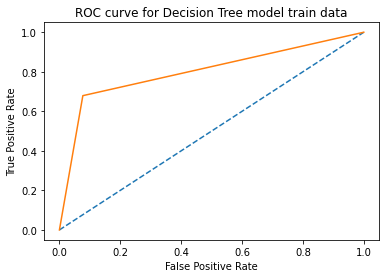

In [176]:
probs = dt_model.predict_proba(X_train) 
probs = probs[:, 1]
dt_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for Decision Tree model train dataset is : %.3f' % dt_train_auc)
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_train_fpr, dt_train_tpr);

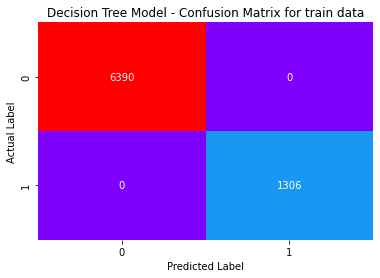

In [177]:
confusion_matrix(y_train,y_train_predict_dt)
sns.heatmap(confusion_matrix(y_train,y_train_predict_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Decision Tree Model - Confusion Matrix for train data')
plt.show()

### Test Data

In [178]:
dt_model.fit(X_test, y_test)

DecisionTreeClassifier()

In [179]:
y_test_predict_dt = dt_model.predict(X_test)

In [180]:
dt_model_score_test = dt_model.score(X_test, y_test)
print('The test score of Decision Tree model is: ',round(dt_model_score_test,2))

The test score of Decision Tree model is:  1.0


In [181]:
confusion_matrix(y_test, y_test_predict_dt)

array([[2754,    0],
       [   0,  545]], dtype=int64)

In [182]:
print(classification_report(y_test, y_test_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2754
           1       1.00      1.00      1.00       545

    accuracy                           1.00      3299
   macro avg       1.00      1.00      1.00      3299
weighted avg       1.00      1.00      1.00      3299



In [183]:
dt_metrics=classification_report(y_test,y_test_predict_dt,output_dict=True) 
ds=pd.DataFrame(dt_metrics).transpose()
dt_test_precision=round(ds.loc["1"][0],2)
dt_test_recall=round(ds.loc["1"][1],2)
dt_test_f1=round(ds.loc["1"][2],2)
print('dt_test_precision ',dt_test_precision)
print('dt_test_recall ',dt_test_recall)
print('dt_test_f1 ',dt_test_f1)

dt_test_precision  1.0
dt_test_recall  1.0
dt_test_f1  1.0


ROC_AUC score for Decision Tree model test dataset is : 1.000


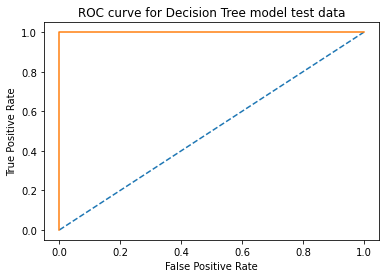

In [184]:
probs = dt_model.predict_proba(X_test) 
probs = probs[:, 1]
dt_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for Decision Tree model test dataset is : %.3f' % dt_test_auc)
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_test_fpr, dt_test_tpr);

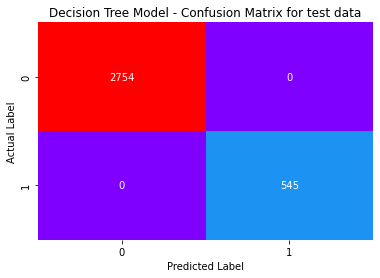

In [185]:
confusion_matrix(y_test,y_test_predict_dt)
sns.heatmap(confusion_matrix(y_test,y_test_predict_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Decision Tree Model - Confusion Matrix for test data')
plt.show()

### Logistic Regression

### Train Data

In [186]:
confusion_matrix(y2_train, y_train_predict_lr)

array([[6164,  207],
       [ 674,  651]], dtype=int64)

In [187]:
print(classification_report(y2_train, y_train_predict_lr))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6371
           1       0.76      0.49      0.60      1325

    accuracy                           0.89      7696
   macro avg       0.83      0.73      0.76      7696
weighted avg       0.88      0.89      0.88      7696



In [188]:
lr_metrics=classification_report(y2_train,y_train_predict_lr,output_dict=True) 
ds=pd.DataFrame(lr_metrics).transpose()
lr_train_precision=round(ds.loc["1"][0],2)
lr_train_recall=round(ds.loc["1"][1],2)
lr_train_f1=round(ds.loc["1"][2],2)
print('lr_train_precision ',lr_train_precision)
print('lr_train_recall ',lr_train_recall)
print('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.76
lr_train_recall  0.49
lr_train_f1  0.6


ROC_AUC score for LR model train dataset is : 0.870


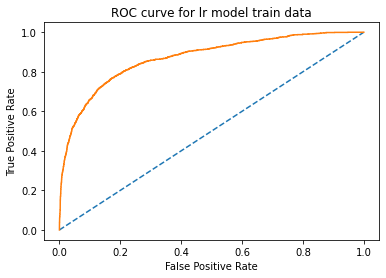

In [189]:
probs = lr_model.predict_proba(X2_train) 
probs = probs[:, 1]
lr_train_auc = roc_auc_score(y2_train, probs)
print('ROC_AUC score for LR model train dataset is : %.3f' % lr_train_auc)
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y2_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for lr model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr);

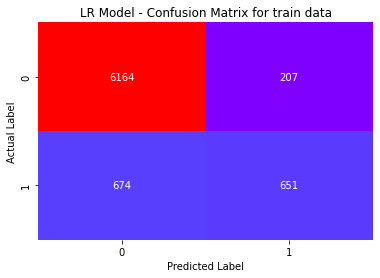

In [190]:
confusion_matrix(y2_train,y_train_predict_lr)
sns.heatmap(confusion_matrix(y2_train,y_train_predict_lr),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LR Model - Confusion Matrix for train data')
plt.show()

### Test Data

In [191]:
confusion_matrix(y2_test, y_test_predict_lr)

array([[2700,   73],
       [ 291,  235]], dtype=int64)

In [192]:
print(classification_report(y2_test, y_test_predict_lr))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2773
           1       0.76      0.45      0.56       526

    accuracy                           0.89      3299
   macro avg       0.83      0.71      0.75      3299
weighted avg       0.88      0.89      0.88      3299



In [193]:
lr_metrics=classification_report(y2_test,y_test_predict_lr,output_dict=True) 
ds=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(ds.loc["1"][0],2)
lr_test_recall=round(ds.loc["1"][1],2)
lr_test_f1=round(ds.loc["1"][2],2)
print('lr_test_precision ',lr_test_precision)
print('lr_test_recall ',lr_test_recall)
print('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.76
lr_test_recall  0.45
lr_test_f1  0.56


ROC_AUC score for LR model test dataset is : 0.879


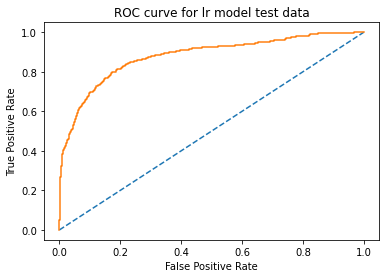

In [194]:
probs = lr_model.predict_proba(X2_test) 
probs = probs[:, 1]
lr_test_auc = roc_auc_score(y2_test, probs)
print('ROC_AUC score for LR model test dataset is : %.3f' % lr_test_auc)
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y2_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for lr model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr);

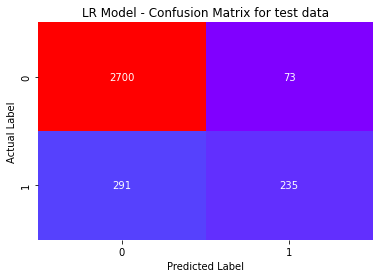

In [195]:
confusion_matrix(y2_test,y_test_predict_lr)
sns.heatmap(confusion_matrix(y2_test,y_test_predict_lr),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LR Model - Confusion Matrix for test data')
plt.show()

### Checking Multicollinearity & VIF

In [196]:
vif = pd.DataFrame()
vif["feature"] = X2_train.columns

In [197]:
vif["VIF"] = [variance_inflation_factor(X2_train.values,i)
                 for i in range(len(X2_train.columns))]
print(vif)

                     feature         VIF
0                     Tenure    1.323785
1                  City_Tier    1.477827
2            CC_Contacted_LY    1.046026
3                     Gender    1.031776
4              Service_Score    1.210141
5         Account_user_count    1.229750
6            account_segment    1.059752
7             CC_Agent_Score    1.021086
8              rev_per_month    1.108913
9                Complain_ly    1.056840
10            rev_growth_yoy    1.048490
11   coupon_used_for_payment    1.278638
12      Day_Since_CC_connect    1.308412
13                  cashback    1.570099
14              Login_device    1.202267
15    Marital_Status_Married    1.919410
16     Marital_Status_Single    1.975695
17  Payment_Cash on Delivery   13.806886
18       Payment_Credit Card   37.971036
19        Payment_Debit Card  264.367636
20          Payment_E wallet  456.734442
21               Payment_UPI   12.150917
22                  clusters   28.047128
23              

### Dropping Variables having VIF>5 and Recheck the VIF Values

In [198]:
X2_train = X2_train.drop(["rev_per_month","Login_device","Service_Score","Account_user_count"], axis=1)
X2_test = X2_test.drop(["rev_per_month","Login_device","Service_Score","Account_user_count"], axis=1)
print('X2_train',X2_train.shape)
print('X2_test',X2_test.shape)

X2_train (7696, 21)
X2_test (3299, 21)


In [199]:
vif = pd.DataFrame()
vif["feature"] = X2_train.columns
vif["VIF"] = [variance_inflation_factor(X2_train.values,i)
                        for i in range(len(X2_train.columns))]
print(vif)

                     feature         VIF
0                     Tenure    1.293474
1                  City_Tier    1.470729
2            CC_Contacted_LY    1.034095
3                     Gender    1.029026
4            account_segment    1.055732
5             CC_Agent_Score    1.016098
6                Complain_ly    1.051492
7             rev_growth_yoy    1.031154
8    coupon_used_for_payment    1.177860
9       Day_Since_CC_connect    1.276168
10                  cashback    1.498417
11    Marital_Status_Married    1.917792
12     Marital_Status_Single    1.968837
13  Payment_Cash on Delivery   13.370609
14       Payment_Credit Card   36.515681
15        Payment_Debit Card  247.789539
16          Payment_E wallet  427.338423
17               Payment_UPI   11.778020
18                  clusters   26.991053
19               Clus_kmeans  726.926629
20                 sil_width   23.161215


In [200]:
vif=[variance_inflation_factor(X2.values,ix) 
     for ix in range(X2.shape[1])]

In [201]:
i=0
for column in X2.columns:
    if i<11:
        print(column,"------>",vif[i])
        i=i+1

Tenure ------> 1.3214227665338742
City_Tier ------> 1.4774899017062066
CC_Contacted_LY ------> 1.0403493105822585
Gender ------> 1.0275779182903753
Service_Score ------> 1.2040199684681423
Account_user_count ------> 1.2324253257156705
account_segment ------> 1.0615778555385678
CC_Agent_Score ------> 1.018184044378464
rev_per_month ------> 1.10474994403319
Complain_ly ------> 1.060020373264482
rev_growth_yoy ------> 1.0463631791533339


### Using p-values Check

In [202]:
X2_train = X2_train.drop(['rev_growth_yoy'],axis=1)
X2_test = X2_test.drop(['rev_growth_yoy'],axis=1)

In [203]:
print('X2_train',X2_train.shape)
print('X2_test',X2_test.shape)
print('y2_train',y2_train.shape)
print('y2_test',y_test.shape)

X2_train (7696, 20)
X2_test (3299, 20)
y2_train (7696,)
y2_test (3299,)


### Random Forest

In [204]:
X1=X
y1=y

In [205]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.30,random_state=1)

In [206]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=1)
rf_model.fit(X1_train, y1_train)

RandomForestClassifier(random_state=1)

In [207]:
y_train_predict_rf = rf_model.predict(X1_train)

In [208]:
print (pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"],index = X1_train.columns).sort_values('Imp',ascending=False))

                               Imp
Tenure                    0.232086
cashback                  0.075411
sil_width                 0.071596
Complain_ly               0.068823
Day_Since_CC_connect      0.062851
CC_Contacted_LY           0.057729
rev_growth_yoy            0.051095
CC_Agent_Score            0.048975
rev_per_month             0.048068
account_segment           0.036585
Account_user_count        0.036089
Marital_Status_Single     0.028353
City_Tier                 0.025110
coupon_used_for_payment   0.023572
Login_device              0.022487
Gender                    0.019440
Service_Score             0.017706
Clus_kmeans               0.011839
Marital_Status_Married    0.011647
clusters                  0.011584
Payment_Credit Card       0.011513
Payment_Cash on Delivery  0.010661
Payment_Debit Card        0.007112
Payment_UPI               0.004927
Payment_E wallet          0.004741


In [209]:
ytrain_predict_prob_rf=rf_model.predict_proba(X1_train)
ytrain_predict_prob_rf
pd.DataFrame(ytrain_predict_prob_rf).head()

,0,1
0,0.11,0.89
1,0.97,0.03
2,0.99,0.01
3,0.97,0.03
4,1.00,0.00


In [210]:
y_train_predict_rf=rf_model.predict(X1_train)

In [211]:
rf_model_score_train = rf_model.score(X1_train, y1_train)
print('The train score of Random Forest model is: ',round(rf_model_score_train,2))

The train score of Random Forest model is:  1.0


In [212]:
rf_metrics=classification_report(y1_train,y_train_predict_rf,output_dict=True) 
ds=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(ds.loc["1"][0],2)
rf_train_recall=round(ds.loc["1"][1],2)
rf_train_f1=round(ds.loc["1"][2],2)
print('rf_train_precision ',rf_train_precision)
print('rf_train_recall ',rf_train_recall)
print('rf_train_f1 ',rf_train_f1)

rf_train_precision  1.0
rf_train_recall  1.0
rf_train_f1  1.0


ROC_AUC score for Decision Tree model train dataset is : 1.000


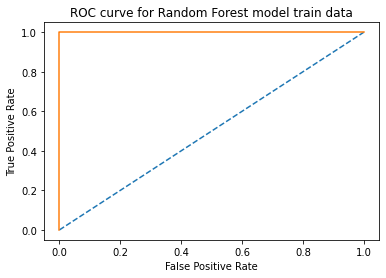

In [213]:
probs = rf_model.predict_proba(X1_train) 
probs = probs[:, 1]
rf_train_auc = roc_auc_score(y1_train, probs)
print('ROC_AUC score for Decision Tree model train dataset is : %.3f' % rf_train_auc)
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y1_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_train_fpr, rf_train_tpr);

In [214]:
rf_model.fit(X1_test, y1_test)

RandomForestClassifier(random_state=1)

In [215]:
y_test_predict_rf = rf_model.predict(X1_test)

In [216]:
rf_model_score_test = rf_model.score(X1_test, y1_test)
print('The test score of Random Forest model is: ',rf_model_score_test)

The test score of Random Forest model is:  1.0


In [217]:
rf_metrics=classification_report(y1_test,y_test_predict_rf,output_dict=True) 
ds=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(ds.loc["1"][0],2)
rf_test_recall=round(ds.loc["1"][1],2)
rf_test_f1=round(ds.loc["1"][2],2)
print('rf_test_precision ',rf_test_precision)
print('rf_test_recall ',rf_test_recall)
print('rf_test_f1 ',rf_test_f1)

rf_test_precision  1.0
rf_test_recall  1.0
rf_test_f1  1.0


ROC_AUC score for Decision Tree model test dataset is : 1.000


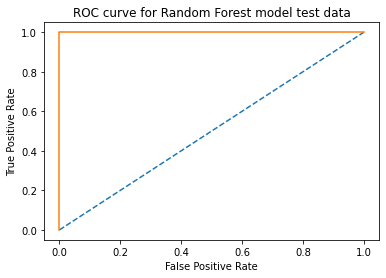

In [218]:
probs = rf_model.predict_proba(X1_test) 
probs = probs[:, 1]
rf_test_auc = roc_auc_score(y1_test, probs)
print('ROC_AUC score for Decision Tree model test dataset is : %.3f' % rf_test_auc)
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y1_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_test_fpr, rf_test_tpr);

### Variable Importance

In [219]:
print (pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"],index = X1_train.columns).sort_values('Imp',ascending=False))

                               Imp
Tenure                    0.216676
cashback                  0.081836
sil_width                 0.074948
CC_Contacted_LY           0.073289
Day_Since_CC_connect      0.065193
rev_growth_yoy            0.053911
rev_per_month             0.051349
Complain_ly               0.049609
CC_Agent_Score            0.046574
account_segment           0.037260
Account_user_count        0.034284
Marital_Status_Single     0.029144
coupon_used_for_payment   0.027955
Login_device              0.021841
Service_Score             0.021235
City_Tier                 0.020386
Marital_Status_Married    0.015877
Gender                    0.015380
Payment_Credit Card       0.012450
clusters                  0.011937
Clus_kmeans               0.010874
Payment_Cash on Delivery  0.008939
Payment_Debit Card        0.008632
Payment_E wallet          0.005362
Payment_UPI               0.005059


In [220]:
ytest_predict_prob_rf=rf_model.predict_proba(X1_test)
ytest_predict_prob_rf
pd.DataFrame(ytest_predict_prob_rf).head()

,0,1
0,1.00,0.00
1,1.00,0.00
2,1.00,0.00
3,0.97,0.03
4,1.00,0.00


In [221]:
y_train_predict_rf=rf_model.predict(X1_train)
y_test_predict_rf=rf_model.predict(X_test)

In [222]:
y_train_predict_rf=rf_model.predict(X1_train)

In [223]:
rf_model_score_train = rf_model.score(X1_train, y1_train)
print('The train score of Random Forest model is: ',round(rf_model_score_train,2))

The train score of Random Forest model is:  0.93


In [224]:
rf_metrics=classification_report(y1_train,y_train_predict_rf,output_dict=True) 
ds=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(ds.loc["1"][0],2)
rf_train_recall=round(ds.loc["1"][1],2)
rf_train_f1=round(ds.loc["1"][2],2)
print('rf_train_precision ',rf_train_precision)
print('rf_train_recall ',rf_train_recall)
print('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.93
rf_train_recall  0.63
rf_train_f1  0.75


ROC_AUC score for Decision Tree model train dataset is : 0.963


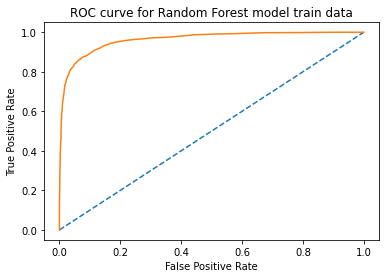

In [225]:
probs = rf_model.predict_proba(X1_train) 
probs = probs[:, 1]
rf_train_auc = roc_auc_score(y1_train, probs)
print('ROC_AUC score for Decision Tree model train dataset is : %.3f' % rf_train_auc)
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y1_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_train_fpr, rf_train_tpr);

In [226]:
rf_model.fit(X1_test, y1_test)

RandomForestClassifier(random_state=1)

In [227]:
y_test_predict_rf = rf_model.predict(X1_test)

In [228]:
rf_model_score_test = rf_model.score(X1_test, y1_test)
print('The test score of Random Forest model is: ',rf_model_score_test)

The test score of Random Forest model is:  1.0


In [229]:
rf_metrics=classification_report(y1_test,y_test_predict_rf,output_dict=True) 
ds=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(ds.loc["1"][0],2)
rf_test_recall=round(ds.loc["1"][1],2)
rf_test_f1=round(ds.loc["1"][2],2)
print('rf_test_precision ',rf_test_precision)
print('rf_test_recall ',rf_test_recall)
print('rf_test_f1 ',rf_test_f1)

rf_test_precision  1.0
rf_test_recall  1.0
rf_test_f1  1.0


ROC_AUC score for Decision Tree model test dataset is : 1.000


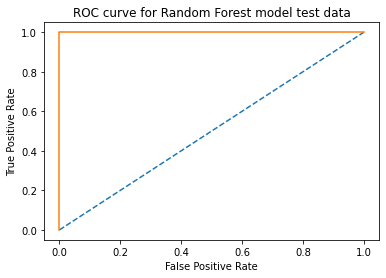

In [230]:
probs = rf_model.predict_proba(X1_test) 
probs = probs[:, 1]
rf_test_auc = roc_auc_score(y1_test, probs)
print('ROC_AUC score for Decision Tree model test dataset is : %.3f' % rf_test_auc)
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y1_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_test_fpr, rf_test_tpr);

# c) Interpretation of the model(s)

### Comparison of the performance metrics from the 3 models

In [231]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Decision Tree Train':[dt_model_score_train,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
'Decision Tree Test':[dt_model_score_test,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
'Random Forest Train':[rf_model_score_train,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
'Random Forest Test':[rf_model_score_test,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
'Logistic Regression Train':[lr_model_score_train,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
'Logistic Regression Test':[lr_model_score_test,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1]},index=index)
round(data,2)

,Decision Tree Train,Decision Tree Test,Random Forest Train,Random Forest Test,Logistic Regression Train,Logistic Regression Test
Accuracy,0.88,1.0,0.93,1.0,0.89,0.89
AUC,0.80,1.0,0.96,1.0,0.87,0.88
Recall,1.00,1.0,0.63,1.0,0.49,0.45
Precision,1.00,1.0,0.93,1.0,0.76,0.76
F1 Score,1.00,1.0,0.75,1.0,0.60,0.56


In [232]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Decision Tree Train':[dt_model_score_train,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
'Decision Tree Test':[dt_model_score_test,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
'Logistic Regression Train':[lr_model_score_train,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
'Logistic Regression Test':[lr_model_score_test,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1]},index=index)
round(data,2)

,Decision Tree Train,Decision Tree Test,Logistic Regression Train,Logistic Regression Test
Accuracy,0.88,1.0,0.89,0.89
AUC,0.80,1.0,0.87,0.88
Recall,1.00,1.0,0.49,0.45
Precision,1.00,1.0,0.76,0.76
F1 Score,1.00,1.0,0.60,0.56


### ROC Curve for the 3 models on the Training data

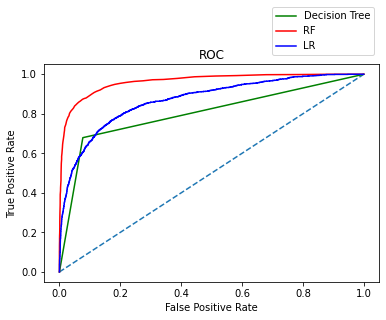

In [233]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_train_fpr,dt_train_tpr,color='green',label="Decision Tree")
plt.plot(rf_train_fpr,rf_train_tpr,color='red',label="RF")
plt.plot(lr_train_fpr,lr_train_tpr,color='blue',label="LR")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), loc='lower right')

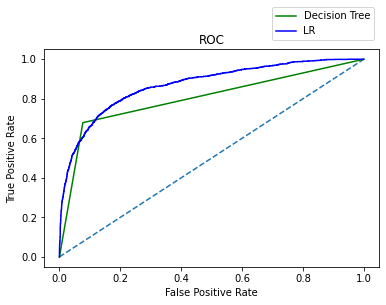

In [234]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_train_fpr,dt_train_tpr,color='green',label="Decision Tree")
plt.plot(lr_train_fpr,lr_train_tpr,color='blue',label="LR")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), loc='lower right')

### ROC Curve for the 3 models on the Test data

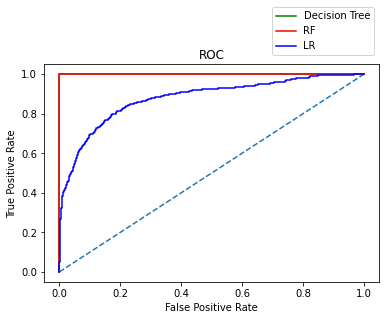

In [235]:
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(dt_test_fpr,dt_test_tpr,color='green',label="Decision Tree")
plt.plot(rf_test_fpr,rf_test_tpr,color='red',label="RF")
plt.plot(lr_test_fpr,lr_test_tpr,color='blue',label="LR")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), loc='lower right')

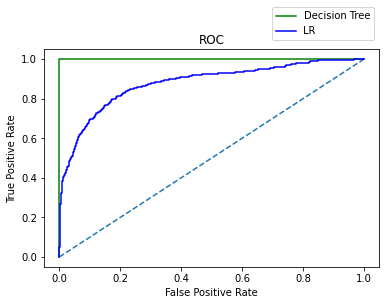

In [236]:
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(dt_test_fpr,dt_test_tpr,color='green',label="Decision Tree")
plt.plot(lr_test_fpr,lr_test_tpr,color='blue',label="LR")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), loc='lower right')

# 2. Model Tuning and business implication

# a) Ensemble modelling (if necessary)

### Random Forest

### Train Data

In [237]:
X1=X
y1=y

In [238]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.30,random_state=1)

In [239]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=1)
rf_model.fit(X1_train, y1_train)

RandomForestClassifier(random_state=1)

In [240]:
y_train_predict_rf = rf_model.predict(X1_train)

In [241]:
print (pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"],index = X1_train.columns).sort_values('Imp',ascending=False))

                               Imp
Tenure                    0.232086
cashback                  0.075411
sil_width                 0.071596
Complain_ly               0.068823
Day_Since_CC_connect      0.062851
CC_Contacted_LY           0.057729
rev_growth_yoy            0.051095
CC_Agent_Score            0.048975
rev_per_month             0.048068
account_segment           0.036585
Account_user_count        0.036089
Marital_Status_Single     0.028353
City_Tier                 0.025110
coupon_used_for_payment   0.023572
Login_device              0.022487
Gender                    0.019440
Service_Score             0.017706
Clus_kmeans               0.011839
Marital_Status_Married    0.011647
clusters                  0.011584
Payment_Credit Card       0.011513
Payment_Cash on Delivery  0.010661
Payment_Debit Card        0.007112
Payment_UPI               0.004927
Payment_E wallet          0.004741


In [242]:
ytrain_predict_prob_rf=rf_model.predict_proba(X1_train)
ytrain_predict_prob_rf
pd.DataFrame(ytrain_predict_prob_rf).head()

,0,1
0,0.11,0.89
1,0.97,0.03
2,0.99,0.01
3,0.97,0.03
4,1.00,0.00


In [243]:
y_train_predict_rf=rf_model.predict(X1_train)

In [244]:
rf_model_score_train = rf_model.score(X1_train, y1_train)
print('The train score of Random Forest model is: ',round(rf_model_score_train,2))

The train score of Random Forest model is:  1.0


In [245]:
rf_metrics=classification_report(y1_train,y_train_predict_rf,output_dict=True) 
ds=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(ds.loc["1"][0],2)
rf_train_recall=round(ds.loc["1"][1],2)
rf_train_f1=round(ds.loc["1"][2],2)
print('rf_train_precision ',rf_train_precision)
print('rf_train_recall ',rf_train_recall)
print('rf_train_f1 ',rf_train_f1)

rf_train_precision  1.0
rf_train_recall  1.0
rf_train_f1  1.0


ROC_AUC score for Decision Tree model train dataset is : 1.000


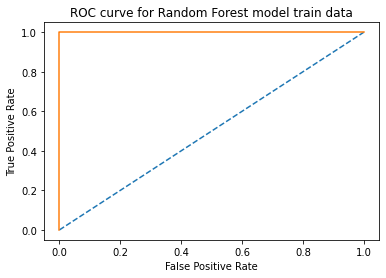

In [246]:
probs = rf_model.predict_proba(X1_train) 
probs = probs[:, 1]
rf_train_auc = roc_auc_score(y1_train, probs)
print('ROC_AUC score for Decision Tree model train dataset is : %.3f' % rf_train_auc)
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y1_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_train_fpr, rf_train_tpr);

### Test Data

In [247]:
rf_model.fit(X1_test, y1_test)

RandomForestClassifier(random_state=1)

In [248]:
y_test_predict_rf = rf_model.predict(X1_test)

In [249]:
rf_model_score_test = rf_model.score(X1_test, y1_test)
print('The test score of Random Forest model is: ',rf_model_score_test)

The test score of Random Forest model is:  1.0


In [250]:
ytest_predict_prob_rf=rf_model.predict_proba(X1_test)
ytest_predict_prob_rf
pd.DataFrame(ytest_predict_prob_rf).head()

,0,1
0,1.00,0.00
1,1.00,0.00
2,1.00,0.00
3,0.97,0.03
4,1.00,0.00


In [251]:
y_test_predict_rf=rf_model.predict(X1_test)

In [252]:
rf_model_score_test = rf_model.score(X1_test, y1_test)
print('The test score of Random Forest model is: ',round(rf_model_score_test,2))

The test score of Random Forest model is:  1.0


In [253]:
rf_metrics=classification_report(y1_test,y_test_predict_rf,output_dict=True) 
ds=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(ds.loc["1"][0],2)
rf_test_recall=round(ds.loc["1"][1],2)
rf_test_f1=round(ds.loc["1"][2],2)
print('rf_test_precision ',rf_test_precision)
print('rf_test_recall ',rf_test_recall)
print('rf_test_f1 ',rf_test_f1)

rf_test_precision  1.0
rf_test_recall  1.0
rf_test_f1  1.0


ROC_AUC score for Decision Tree model test dataset is : 1.000


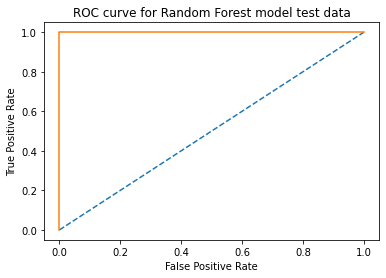

In [254]:
probs = rf_model.predict_proba(X1_test) 
probs = probs[:, 1]
rf_test_auc = roc_auc_score(y1_test, probs)
print('ROC_AUC score for Decision Tree model test dataset is : %.3f' % rf_test_auc)
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y1_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_test_fpr, rf_test_tpr);

# b) Any other model tuning measures (if applicable)

### Applying SMOTE to Decision Tree Model to Balance the Data

In [255]:
dt_model_smote= tree.DecisionTreeClassifier()

In [256]:
from sklearn.feature_selection import RFE
selector = RFE(estimator = dt_model_smote, n_features_to_select=21, step=1)

In [257]:
selector = selector.fit(X_train, y_train)

In [258]:
selector.n_features_

21

In [259]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 4,
       1, 3, 1])

In [260]:
df = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
0,Tenure,1
1,City_Tier,1
2,CC_Contacted_LY,1
3,Gender,1
4,Service_Score,1
5,Account_user_count,1
6,account_segment,1
7,CC_Agent_Score,1
8,rev_per_month,1
9,Complain_ly,1


In [261]:
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [262]:
selector_smote = selector.fit(X_res, y_res)

In [263]:
selector_smote.n_features_

21

In [264]:
pred_train_smote_dt = selector_smote.predict(X_res)
pred_test_smote_dt = selector_smote.predict(X_test)

### Applying GridSearch to Fine Tune the Balanced data

In [265]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [150,300,450],
}
dt = DecisionTreeClassifier(random_state=1)
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv = 10)

In [266]:
grid_search_dt.fit(X_res, y_res)
print(grid_search_dt.best_params_)
dt_model_grid = grid_search_dt.best_estimator_
dt_model_grid

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [267]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60],
    'min_samples_split': [150,300,450],
}
dt = DecisionTreeClassifier(random_state=1)
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv = 10)

In [268]:
grid_search_dt.fit(X_res, y_res)
print(grid_search_dt.best_params_)
dt_model_grid = grid_search_dt.best_estimator_
dt_model_grid

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [269]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [3,4,5,6,8],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54],
    'min_samples_split': [250, 270, 280, 290, 300,310],
}
dt = DecisionTreeClassifier(random_state=1)
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv = 10)

In [270]:
grid_search_dt.fit(X_res, y_res)
print(grid_search_dt.best_params_)
dt_model_grid = grid_search_dt.best_estimator_
dt_model_grid

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=250,
                       random_state=1)

In [271]:
print (pd.DataFrame(dt_model_grid.feature_importances_, columns = ["Imp"], index = X_res.columns))

                               Imp
Tenure                    0.585038
City_Tier                 0.034028
CC_Contacted_LY           0.000083
Gender                    0.000000
Service_Score             0.000553
Account_user_count        0.068112
account_segment           0.030944
CC_Agent_Score            0.062447
rev_per_month             0.032024
Complain_ly               0.098889
rev_growth_yoy            0.002173
coupon_used_for_payment   0.017577
Day_Since_CC_connect      0.020016
cashback                  0.000000
Login_device              0.003941
Marital_Status_Married    0.020745
Marital_Status_Single     0.003605
Payment_Cash on Delivery  0.000000
Payment_Credit Card       0.002035
Payment_Debit Card        0.000000
Payment_E wallet          0.000000
Payment_UPI               0.000000
clusters                  0.006518
Clus_kmeans               0.000000
sil_width                 0.011275


In [272]:
pred_train_grid_dt=dt_model_grid.predict(X_res)
pred_test_grid_dt=dt_model_grid.predict(X_test)

### Tuned Decision Tree Model for Train Data

In [273]:
pred_train_grid_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [274]:
dt_model_score_train_grid = dt_model_grid.score(X_res, y_res)
print('The train score of Tuned Decision Tree model is: ',round(dt_model_score_train_grid,2))

The train score of Tuned Decision Tree model is:  0.86


In [275]:
pred_train_grid_dt
pred_train_grid_dt_prob=dt_model_grid.predict_proba(X_res)
pred_train_grid_dt_prob
pd.DataFrame(pred_train_grid_dt_prob).head()

,0,1
0,0.922792,0.077208
1,0.987000,0.013000
2,0.991176,0.008824
3,0.881266,0.118734
4,0.922792,0.077208


In [276]:
print(classification_report(y_res, pred_train_grid_dt),'\n')

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      6390
           1       0.85      0.88      0.87      6390

    accuracy                           0.86     12780
   macro avg       0.86      0.86      0.86     12780
weighted avg       0.86      0.86      0.86     12780
 



In [277]:
dt_metrics=classification_report(y_res, pred_train_grid_dt,output_dict=True)
ds1=pd.DataFrame(dt_metrics).transpose()
dt_train_precision_grid=round(ds1.loc["1"][0],2)
dt_train_recall_grid=round(ds1.loc["1"][1],2)
dt_train_f1_grid=round(ds1.loc["1"][2],2)
print ('dt_train_precision_grid ',dt_train_precision_grid)
print ('dt_train_recall_grid ',dt_train_recall_grid)
print ('dt_train_f1_grid ',dt_train_f1_grid)

dt_train_precision_grid  0.85
dt_train_recall_grid  0.88
dt_train_f1_grid  0.87


In [278]:
confusion_matrix(y_res, pred_train_grid_dt)

array([[5411,  979],
       [ 769, 5621]], dtype=int64)

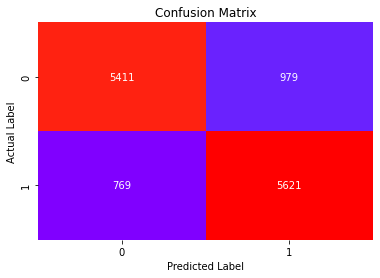

In [279]:
confusion_matrix(y_res, pred_train_grid_dt)
sns.heatmap(confusion_matrix(y_res, pred_train_grid_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Area under Curve is 0.93


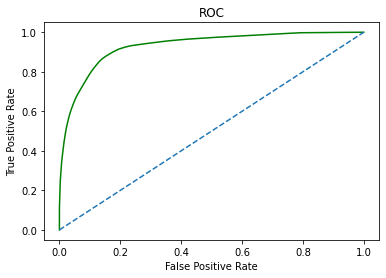

In [280]:
dt_train_fpr_grid, dt_train_tpr_grid,_=roc_curve(y_res,dt_model_grid.predict_proba(X_res)[:,1])
plt.plot(dt_train_fpr_grid,dt_train_tpr_grid,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
dt_train_auc_grid=roc_auc_score(y_res,dt_model_grid.predict_proba(X_res)[:,1])
print('Area under Curve is', round(dt_train_auc_grid,2))

### Tuned Decision Tree Model for Test Data

In [281]:
dt_model_grid.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [282]:
dt_model_score_test_grid = dt_model_grid.score(X_test, y_test)
print('The test score of Tuned Decision Tree model is: ',round(dt_model_score_test_grid,2))

The test score of Tuned Decision Tree model is:  0.84


In [283]:
pred_test_grid_dt
pred_test_grid_dt_grid=dt_model_grid.predict_proba(X_test)
pred_test_grid_dt_grid
pd.DataFrame(pred_test_grid_dt_grid).head()

,0,1
0,0.987000,0.013000
1,0.987000,0.013000
2,0.991176,0.008824
3,0.987000,0.013000
4,0.344660,0.655340


In [284]:
print(classification_report(y_test, pred_test_grid_dt),'\n')

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2754
           1       0.50      0.82      0.62       545

    accuracy                           0.84      3299
   macro avg       0.73      0.83      0.76      3299
weighted avg       0.88      0.84      0.85      3299
 



In [285]:
dt_metrics=classification_report(y_test, pred_test_grid_dt,output_dict=True)
ds1=pd.DataFrame(dt_metrics).transpose()
dt_test_precision_grid=round(ds1.loc["1"][0],2)
dt_test_recall_grid=round(ds1.loc["1"][1],2)
dt_test_f1_grid=round(ds1.loc["1"][2],2)
print ('dt_test_precision_grid ',dt_test_precision_grid)
print ('dt_test_recall_grid ',dt_test_recall_grid)
print ('dt_test_f1_grid ',dt_test_f1_grid)

dt_test_precision_grid  0.5
dt_test_recall_grid  0.82
dt_test_f1_grid  0.62


In [286]:
confusion_matrix(y_test, pred_test_grid_dt)

array([[2313,  441],
       [  98,  447]], dtype=int64)

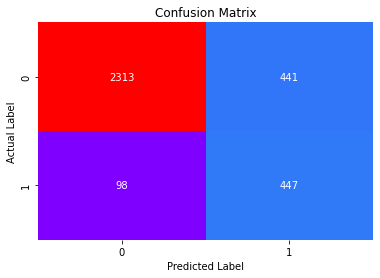

In [287]:
confusion_matrix(y_test, pred_test_grid_dt)
sns.heatmap(confusion_matrix(y_test, pred_test_grid_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Area under Curve is 0.88


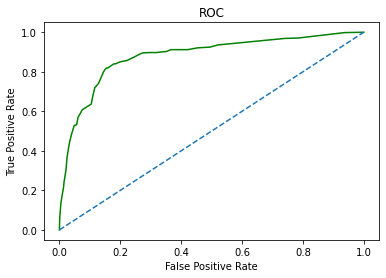

In [288]:
dt_test_fpr_grid, dt_test_tpr_grid,_=roc_curve(y_test,dt_model_grid.predict_proba(X_test)[:,1])
plt.plot(dt_test_fpr_grid,dt_test_tpr_grid,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
dt_test_auc_grid=roc_auc_score(y_test,dt_model_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', round(dt_test_auc_grid,2))

### Applying SMOTE to Random Forest Model to Balance the Data

In [289]:
rf_model_smote=RandomForestClassifier(n_estimators=100,random_state=1)

In [290]:
selector = RFE(estimator = rf_model_smote, n_features_to_select=21, step=1)

In [291]:
selector = selector.fit(X1_train, y1_train)

In [292]:
selector.n_features_

21

In [293]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 5, 4,
       1, 1, 1])

In [294]:
df = pd.DataFrame({'Feature': X1_train.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
0,Tenure,1
1,City_Tier,1
2,CC_Contacted_LY,1
3,Gender,1
4,Service_Score,1
5,Account_user_count,1
6,account_segment,1
7,CC_Agent_Score,1
8,rev_per_month,1
9,Complain_ly,1


In [295]:
sm = SMOTE(random_state=33)
X1_res, y1_res = sm.fit_resample(X1_train, y1_train)

In [296]:
selector_smote_rf = selector.fit(X1_res, y1_res)

In [297]:
selector_smote_rf.n_features_

21

In [298]:
pred_train_smote_rf = selector_smote_rf.predict(X1_res)
pred_test_smote_rf = selector_smote_rf.predict(X1_test)

### Applying GridSearch to Fine Tune the Balanced data

In [299]:
param_grid_rf = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}
rf = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5)

In [300]:
grid_search_rf.fit(X1_res, y1_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [301]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [302]:
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

In [303]:
print (pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"],index = X1_train.columns).sort_values('Imp',ascending=False))

                               Imp
Tenure                    0.385818
Complain_ly               0.108735
account_segment           0.054463
Day_Since_CC_connect      0.048078
CC_Agent_Score            0.044362
rev_per_month             0.043195
Account_user_count        0.042615
cashback                  0.029537
Marital_Status_Married    0.028798
Marital_Status_Single     0.027045
coupon_used_for_payment   0.025625
rev_growth_yoy            0.024616
sil_width                 0.023055
City_Tier                 0.022836
CC_Contacted_LY           0.022380
Service_Score             0.019414
Login_device              0.011628
Gender                    0.007663
Payment_Credit Card       0.005925
Payment_Cash on Delivery  0.005877
Clus_kmeans               0.005598
clusters                  0.005332
Payment_E wallet          0.003165
Payment_Debit Card        0.002822
Payment_UPI               0.001419


In [304]:
pred_train_grid_rf=best_grid_rf.predict(X1_res)
pred_test_grid_rf=best_grid_rf.predict(X1_test)

### Tuned Random Forest Model for Train Data

In [305]:
pred_train_grid_rf

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [306]:
rf_model_score_train_grid = best_grid_rf.score(X1_res, y1_res)
print('The train score of Tuned Random Forest model is: ',round(rf_model_score_train_grid,2))

The train score of Tuned Random Forest model is:  0.94


In [307]:
pred_train_grid_rf
pred_train_grid_rf_prob=best_grid_rf.predict_proba(X1_res)
pred_train_grid_rf_prob
pd.DataFrame(pred_train_grid_rf_prob).head()

,0,1
0,0.575018,0.424982
1,0.927065,0.072935
2,0.919048,0.080952
3,0.858591,0.141409
4,0.943564,0.056436


In [308]:
print(classification_report(y1_res, pred_train_grid_rf),'\n')

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6371
           1       0.94      0.94      0.94      6371

    accuracy                           0.94     12742
   macro avg       0.94      0.94      0.94     12742
weighted avg       0.94      0.94      0.94     12742
 



In [309]:
rf_metrics=classification_report(y1_res, pred_train_grid_rf,output_dict=True)
ds1=pd.DataFrame(rf_metrics).transpose()
rf_train_precision_grid=round(ds1.loc["1"][0],2)
rf_train_recall_grid=round(ds1.loc["1"][1],2)
rf_train_f1_grid=round(ds1.loc["1"][2],2)
print ('rf_train_precision_grid ',rf_train_precision_grid)
print ('rf_train_recall_grid ',rf_train_recall_grid)
print ('rf_train_f1_grid ',rf_train_f1_grid)

rf_train_precision_grid  0.94
rf_train_recall_grid  0.94
rf_train_f1_grid  0.94


In [310]:
confusion_matrix(y1_res, pred_train_grid_rf)

array([[5985,  386],
       [ 357, 6014]], dtype=int64)

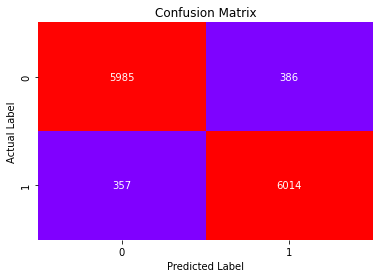

In [311]:
confusion_matrix(y1_res, pred_train_grid_rf)
sns.heatmap(confusion_matrix(y1_res, pred_train_grid_rf),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Area under Curve is 0.99


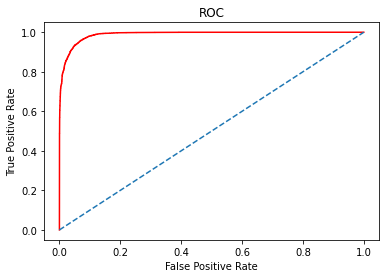

In [312]:
rf_train_fpr_grid, rf_train_tpr_grid,_=roc_curve(y1_res,best_grid_rf.predict_proba(X1_res)[:,1])
plt.plot(rf_train_fpr_grid,rf_train_tpr_grid,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc_grid=roc_auc_score(y1_res,best_grid_rf.predict_proba(X1_res)[:,1])
print('Area under Curve is', round(rf_train_auc_grid,2))

### Tuned Random Forest Model for Test Data

In [313]:
pred_test_grid_rf

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [314]:
rf_model_score_test_grid = best_grid_rf.score(X1_test, y1_test)
print('The test score of Tuned Random Forest model is: ',round(rf_model_score_test_grid,2))

The test score of Tuned Random Forest model is:  0.9


In [315]:
pred_test_grid_rf
pred_test_grid_rf_grid=best_grid_rf.predict_proba(X1_test)
pred_test_grid_rf_grid
pd.DataFrame(pred_test_grid_rf_grid).head()

,0,1
0,0.926282,0.073718
1,0.927817,0.072183
2,0.958211,0.041789
3,0.874360,0.125640
4,0.934543,0.065457


In [316]:
print(classification_report(y1_test, pred_test_grid_rf),'\n')

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2773
           1       0.67      0.80      0.73       526

    accuracy                           0.90      3299
   macro avg       0.81      0.86      0.83      3299
weighted avg       0.91      0.90      0.91      3299
 



In [317]:
rf_metrics=classification_report(y1_test, pred_test_grid_rf,output_dict=True)
ds1=pd.DataFrame(rf_metrics).transpose()
rf_test_precision_grid=round(ds1.loc["1"][0],2)
rf_test_recall_grid=round(ds1.loc["1"][1],2)
rf_test_f1_grid=round(ds1.loc["1"][2],2)
print ('rf_test_precision_grid ',rf_test_precision_grid)
print ('rf_test_recall_grid ',rf_test_recall_grid)
print ('rf_test_f1_grid ',rf_test_f1_grid)

rf_test_precision_grid  0.67
rf_test_recall_grid  0.8
rf_test_f1_grid  0.73


In [318]:
confusion_matrix(y1_test, pred_test_grid_rf)

array([[2563,  210],
       [ 105,  421]], dtype=int64)

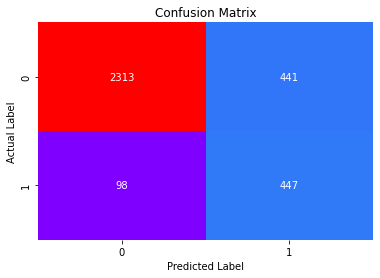

In [319]:
confusion_matrix(y_test, pred_test_grid_dt)
sns.heatmap(confusion_matrix(y_test, pred_test_grid_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Area under Curve is 0.95


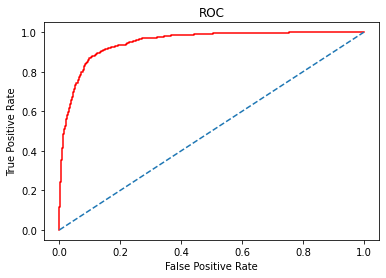

In [320]:
rf_test_fpr_grid, rf_test_tpr_grid,_=roc_curve(y1_test,best_grid_rf.predict_proba(X1_test)[:,1])
plt.plot(rf_test_fpr_grid,rf_test_tpr_grid,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc_grid=roc_auc_score(y1_test,best_grid_rf.predict_proba(X1_test)[:,1])
print('Area under Curve is', round(rf_test_auc_grid,2))

### Applying SMOTE to Logistic Regression Model

In [321]:
lr_model_smote=LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)

In [322]:
selector = RFE(estimator = lr_model_smote, n_features_to_select=21, step=1)

In [323]:
selector = selector.fit(X2_train, y2_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.2s finished


In [324]:
selector.n_features_

20

In [325]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [326]:
df = pd.DataFrame({'Feature': X2_train.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
0,Tenure,1
1,City_Tier,1
2,CC_Contacted_LY,1
3,Gender,1
4,account_segment,1
5,CC_Agent_Score,1
6,Complain_ly,1
7,coupon_used_for_payment,1
8,Day_Since_CC_connect,1
9,cashback,1


In [327]:
sm = SMOTE(random_state=33)
X2_res, y2_res = sm.fit_resample(X2_train, y2_train)

In [328]:
selector_smote_lr = selector.fit(X2_res, y2_res)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.6s finished


In [329]:
selector_smote_lr.n_features_

20

In [330]:
pred_train_smote_lr = selector_smote_lr.predict(X2_res)
pred_test_smote_lr = selector_smote_lr.predict(X2_test)

### Applying GridSearch to Fine Tune the Balanced data

In [331]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [332]:
model_grid = LogisticRegression(max_iter=10000,n_jobs=2)

In [333]:
grid_search = GridSearchCV(estimator = model_grid, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [334]:
grid_search.fit(X2_res, y2_res)

C:\Users\dheepig\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [335]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag',
                   tol=1e-05)


In [336]:
lr_model_grid = grid_search.best_estimator_

In [337]:
pred_train_grid_lr = lr_model_grid.predict(X2_res)
pred_test_grid_lr = lr_model_grid.predict(X2_test)

### Tuned Logistic Regression Model for Train Data

In [338]:
pred_train_grid_lr

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [339]:
lr_model_score_train_grid = lr_model_grid.score(X2_res, y2_res)
print('The train score of Tuned Logistic Regression model is: ',round(lr_model_score_train_grid,2))

The train score of Tuned Logistic Regression model is:  0.79


In [340]:
pred_train_grid_lr
pred_train_grid_lr_prob=lr_model_grid.predict_proba(X2_res)
pred_train_grid_lr_prob
pd.DataFrame(pred_train_grid_lr_prob).head()

,0,1
0,0.796486,0.203514
1,0.964693,0.035307
2,0.758393,0.241607
3,0.944818,0.055182
4,0.875964,0.124036


In [341]:
print(classification_report(y2_res, pred_train_grid_lr),'\n')

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      6371
           1       0.78      0.82      0.80      6371

    accuracy                           0.79     12742
   macro avg       0.79      0.79      0.79     12742
weighted avg       0.79      0.79      0.79     12742
 



In [342]:
lr_metrics=classification_report(y2_res, pred_train_grid_lr,output_dict=True)
ds1=pd.DataFrame(lr_metrics).transpose()
lr_train_precision_grid=round(ds1.loc["1"][0],2)
lr_train_recall_grid=round(ds1.loc["1"][1],2)
lr_train_f1_grid=round(ds1.loc["1"][2],2)
print ('lr_train_precision_grid ',lr_train_precision_grid)
print ('lr_train_recall_grid ',lr_train_recall_grid)
print ('lr_train_f1_grid ',lr_train_f1_grid)

lr_train_precision_grid  0.78
lr_train_recall_grid  0.82
lr_train_f1_grid  0.8


In [343]:
confusion_matrix(y2_res, pred_train_grid_lr)

array([[4891, 1480],
       [1170, 5201]], dtype=int64)

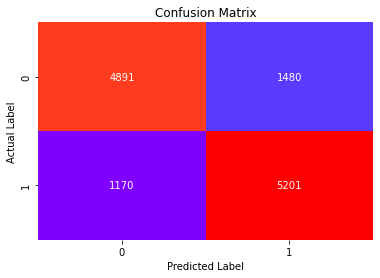

In [344]:
confusion_matrix(y2_res, pred_train_grid_lr)
sns.heatmap(confusion_matrix(y2_res, pred_train_grid_lr),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Area under Curve is 0.87


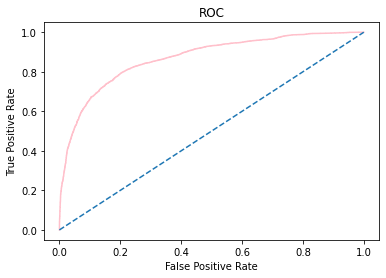

In [345]:
lr_train_fpr_grid, lr_train_tpr_grid,_=roc_curve(y2_res,lr_model_grid.predict_proba(X2_res)[:,1])
plt.plot(lr_train_fpr_grid,lr_train_tpr_grid,color='pink')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lr_train_auc_grid=roc_auc_score(y2_res,lr_model_grid.predict_proba(X2_res)[:,1])
print('Area under Curve is', round(lr_train_auc_grid,2))

### Tuned Logistic Regression Model for Test Data

In [346]:
lr_model_grid.predict(X2_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [347]:
lr_model_score_test_grid = lr_model_grid.score(X2_test, y2_test)
print('The test score of Tuned Logistic Regression model is: ',round(lr_model_score_test_grid,2))

The test score of Tuned Logistic Regression model is:  0.78


In [348]:
pred_test_grid_lr
pred_test_grid_lr_prob=lr_model_grid.predict_proba(X2_test)
pred_test_grid_lr_prob
pd.DataFrame(pred_test_grid_lr_prob).head()

,0,1
0,0.726172,0.273828
1,0.996887,0.003113
2,0.989044,0.010956
3,0.863727,0.136273
4,0.982161,0.017839


In [349]:
print(classification_report(y2_test, pred_test_grid_lr),'\n')

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2773
           1       0.41      0.82      0.54       526

    accuracy                           0.78      3299
   macro avg       0.68      0.79      0.70      3299
weighted avg       0.87      0.78      0.81      3299
 



In [350]:
lr_metrics=classification_report(y2_test, pred_test_grid_lr,output_dict=True)
ds1=pd.DataFrame(lr_metrics).transpose()
lr_test_precision_grid=round(ds1.loc["1"][0],2)
lr_test_recall_grid=round(ds1.loc["1"][1],2)
lr_test_f1_grid=round(ds1.loc["1"][2],2)
print ('lr_test_precision_grid ',lr_test_precision_grid)
print ('lr_test_recall_grid ',lr_test_recall_grid)
print ('lr_test_f1_grid ',lr_test_f1_grid)

lr_test_precision_grid  0.41
lr_test_recall_grid  0.82
lr_test_f1_grid  0.54


In [351]:
confusion_matrix(y2_test, pred_test_grid_lr)

array([[2144,  629],
       [  97,  429]], dtype=int64)

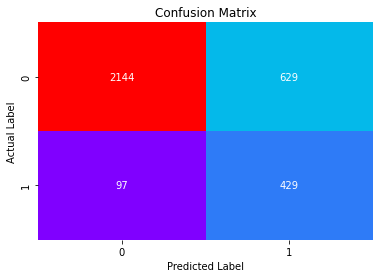

In [352]:
confusion_matrix(y2_test, pred_test_grid_lr)
sns.heatmap(confusion_matrix(y2_test, pred_test_grid_lr),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Area under Curve is 0.86


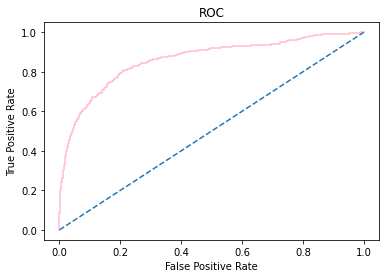

In [353]:
lr_test_fpr_grid, lr_test_tpr_grid,_=roc_curve(y2_test,lr_model_grid.predict_proba(X2_test)[:,1])
plt.plot(lr_test_fpr_grid,lr_test_tpr_grid,color='pink')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lr_test_auc_grid=roc_auc_score(y2_test,lr_model_grid.predict_proba(X2_test)[:,1])
print('Area under Curve is', round(lr_test_auc_grid,2))

# c) Interpretation of the most optimum model and its implication on the business

### Comparison of the performance metrics from the 3 models - Tuned

In [354]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'DT Train GRID':[dt_model_score_train_grid,dt_train_auc_grid,dt_train_recall_grid,dt_train_precision_grid,dt_train_f1_grid],
'DT Test GRID':[dt_model_score_test_grid,dt_test_auc_grid,dt_test_recall_grid,dt_test_precision_grid,dt_test_f1_grid],
'RF Train GRID':[rf_model_score_train_grid,rf_train_auc_grid,rf_train_recall_grid,rf_train_precision_grid,rf_train_f1_grid],
'RF Test GRID':[rf_model_score_test_grid,rf_test_auc_grid,rf_test_recall_grid,rf_test_precision_grid,rf_test_f1_grid],
'LR Train GRID':[lr_model_score_train_grid,lr_train_auc_grid,lr_train_recall_grid,lr_train_precision_grid,lr_train_f1_grid],
'LR Test GRID':[lr_model_score_test_grid,lr_test_auc_grid,lr_test_recall_grid,lr_test_precision_grid,lr_test_f1_grid]},index=index)
round(data,2)

,DT Train GRID,DT Test GRID,RF Train GRID,RF Test GRID,LR Train GRID,LR Test GRID
Accuracy,0.86,0.84,0.94,0.90,0.79,0.78
AUC,0.93,0.88,0.99,0.95,0.87,0.86
Recall,0.88,0.82,0.94,0.80,0.82,0.82
Precision,0.85,0.50,0.94,0.67,0.78,0.41
F1 Score,0.87,0.62,0.94,0.73,0.80,0.54


### ROC Curve for the 3 models on the Training data - Tuned

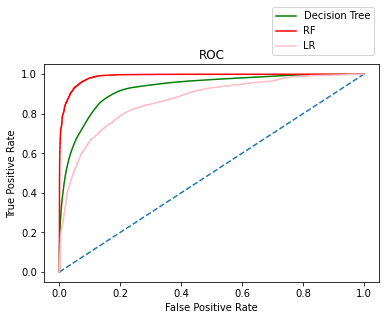

In [355]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_train_fpr_grid,dt_train_tpr_grid,color='green',label="Decision Tree")
plt.plot(rf_train_fpr_grid,rf_train_tpr_grid,color='red',label="RF")
plt.plot(lr_train_fpr_grid,lr_train_tpr_grid,color='pink',label="LR")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), loc='lower right')

### ROC Curve for the 3 models on the Test data - Tuned

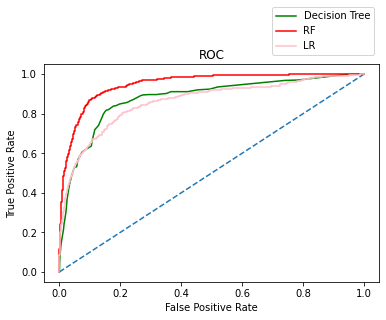

In [356]:
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(dt_test_fpr_grid,dt_test_tpr_grid,color='green',label="Decision Tree")
plt.plot(rf_test_fpr_grid,rf_test_tpr_grid,color='red',label="RF")
plt.plot(lr_test_fpr_grid,lr_test_tpr_grid,color='pink',label="LR")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), loc='lower right')